# 第１２章

- ディープラーニングを予測に使う
- 様々な種類のディープラーニングモデルを調べる
- ディープラーニングを時系列予測に使うための準備


これまで2部までで学んだモデルがうまく行く例:
- データセットが小さい
- 季節周期が月次・四半期次・年次

データセットが非常に大きい場合は統計学的モデルは非常に低速になり機能が低下。

ここで利用するのが**ディープラーニング**

---

## ディープラーニングとは


**ディープラーニング（Deep Learning）** は、「人間の脳のように学習する」ことを目指した **人工ニューラルネットワーク（Artificial Neural Networks）** を使った **機械学習の一種** です。

---

##  機械学習との違いは？

| 項目        | 機械学習（従来型）      | ディープラーニング               |
| --------- | -------------- | ----------------------- |
| 特徴量（特徴抽出） | **人間が設計する**    | **自動で学習する**             |
| モデル構造     | 比較的シンプル（SVMなど） | ニューラルネットワークで**多層構造**を持つ |
| 大量データへの対応 | 苦手             | **得意（ビッグデータと相性◎）**      |
| 計算資源      | 比較的軽い          | **GPUなどが必要な重い処理**       |

---

##  ディープラーニングの構造：ニューラルネットワーク

基本構成は以下の3つの層から成ります：

1. **入力層（Input layer）**

   * 例：画像のピクセル、時系列の数値、単語のベクトルなど

2. **隠れ層（Hidden layers）**

   * **これが“ディープ（深層）”の部分！**
   * 各層のノードが前の層からの重み付き入力を受け、活性化関数を通じて次に伝える

3. **出力層（Output layer）**

   * 最終的な予測結果（分類、回帰など）

---

##  ニューラルネットワークの数式（シンプル版）

1つのニューロンでの計算：

$$
y = f(Wx + b)
$$

* $x$：入力（ベクトル）
* $W$：重み（行列）
* $b$：バイアス（定数）
* $f$：活性化関数（ReLU, sigmoid など）
* $y$：出力

---

##  学習の流れ（訓練）

1. **順伝播（forward propagation）**

   * 入力を順に層を通して出力を得る

2. **損失関数（loss）を計算**

   * 出力と正解ラベルの誤差（例：MSEやクロスエントロピー）

3. **逆伝播（backpropagation）で誤差を伝搬**

   * 損失を各重みに対して微分して「誤差の責任」を割り振る

4. **重みの更新（勾配降下法）**

   * 誤差が小さくなるように重みを調整していく

---

第３部からはほぼどのような時系列に対しても取り組めるように様々なモデルアーキテクチャを取り上げる。

ここで復習としてディープラーニングのかんたんな知識について

**活性化関数、損失関数、パッチ、層、エポック**についておさらい

---

## 活性化関数（Activation Function）

### ● 目的

線形な重み付き和だけでは表現できない**非線形性**をモデルに導入し、複雑な関数やパターンを学習可能にする。

### ● よく使われる関数と特徴

| 関数名                         | 数式 or 特徴                                   | 具体的な用途                                         |
| --------------------------- | ------------------------------------------ | ---------------------------------------------- |
| ReLU（Rectified Linear Unit） | $f(x) = \max(0, x)$                        | 深層ネットワークで広く使われる。勾配消失しにくい。                      |
| Sigmoid                     | $f(x) = \frac{1}{1 + e^{-x}}$              | 出力が \[0,1] に収まるので**確率**として解釈したいときに使われる（例：二値分類） |
| tanh                        | $f(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}$ | 出力が \[-1,1] なのでゼロ中心性あり（ただし勾配消失あり）              |

---

## 損失関数（Loss Function）

### ● 目的

モデルの**予測と実際の値との誤差を定量化**。モデルはこの損失を**最小化**するように学習される。

### ● 代表例

| 関数名                      | 用途     | 説明                                              |
| ------------------------ | ------ | ----------------------------------------------- |
| MSE（平均二乗誤差）              | 回帰     | $\text{MSE} = \frac{1}{n} \sum (y - \hat{y})^2$ |
| MAE（平均絶対誤差）              | 回帰     | 外れ値に強い                                          |
| Binary Crossentropy      | 二値分類   | ロジスティック回帰など                                     |
| Categorical Crossentropy | 多クラス分類 | ソフトマックス出力と組み合わせる                                |

---

## バッチ（Batch）

### ● 目的

全部のデータではなく、**一部ずつ学習**させることで計算量を抑え、安定的な学習を可能にする。

### ● 用語整理

* **バッチサイズ**：1回の学習に使うデータの数
* **ステップ数**：1エポックあたりのバッチ回数
* **例**：データ数 = 1000、バッチサイズ = 100 → 1エポック = 10ステップ

### ● メリット

* メモリ消費が少ない
* ノイズがある勾配により**局所最適からの脱出**もしやすい

---

## 層（Layer）

### ● 目的

情報を順に処理・抽象化していく構造単位。

### ● よくある層の種類

| 層名              | 用途     | 例                                   |
| --------------- | ------ | ----------------------------------- |
| Dense（全結合）      | 一般的なNN | `Dense(128, activation='relu')`     |
| Conv1D / Conv2D | 画像・時系列 | `Conv1D(filters=64, kernel_size=3)` |
| LSTM, GRU       | 時系列    | `LSTM(64)`                          |
| Dropout         | 過学習抑制  | `Dropout(0.2)`                      |

---

## エポック（Epoch）

### ● 目的

**全データを一巡して学習させる回数**。

### ● 注意点

* エポック数が**少なすぎると未学習**
* 多すぎると\*\*過学習（オーバーフィット）\*\*になることもある

## 12.1 時系列予測にディープラーニングを使う状況

----
データセットのサイズが大きい場合SARIMAXモデルでは適合に時間を要する。
これは理想的なモデルの選択とは言えない。

また、データに2つ以上周期性がある場合SARIMAXモデルは使えない。
例えば１時間毎に気温を予測する場合考えられる周期性は日次と年次の２つである。
この場合、SARIMAXを適合させると通常は残差が正規分布にならず、相関する結果となることがわかっている。<br>

------
SARIMAXモデルの一般形を明記した上で、「季節性が2つ以上存在する場合」にモデルが適用できない、あるいは適用が困難であることを**数式的に**示す。

---

以下は、アップロードされた画像（SARIMAXモデルの定義）に合わせて、あなたが示した文章を**式と整合の取れた形で再構成**したものです。

---

## 9.1 SARIMAXモデルを調べる

### ◆ SARIMAモデルの定義

SARIMAモデル（季節あり自己回帰和分移動平均モデル）は以下のように定義されます：

$$
\Phi(L^s)\phi(L)(1 - L)^d(1 - L^s)^D y_t = C + \Theta(L^s)\theta(L)\varepsilon_t
$$

ここで、

* $y_t$：観測された時系列データ
* $\varepsilon_t$：ホワイトノイズ誤差項
* $\phi(L) = 1 - \sum_{i=1}^p \phi_i L^i$：非季節自己回帰（AR）成分
* $\theta(L) = 1 + \sum_{i=1}^q \theta_i L^i$：非季節移動平均（MA）成分
* $\Phi(L^s) = 1 - \sum_{i=1}^P \Phi_i L^{si}$：季節AR成分（周期 s）
* $\Theta(L^s) = 1 + \sum_{i=1}^Q \Theta_i L^{si}$：季節MA成分
* $(1 - L)^d$：非季節差分
* $(1 - L^s)^D$：季節差分
* $L$：バックシフト演算子（$L^k y_t = y_{t-k}$）

---

### ◆ SARIMAXモデル（外生変数付き）

SARIMAX（Seasonal ARIMA with eXogenous variables）モデルでは、外生変数 $x_t$ を用いて次のように拡張されます：

$$
\Phi(L^s)\phi(L)(1 - L)^d(1 - L^s)^D y_t = \Theta(L^s)\theta(L)\varepsilon_t + \beta_0 + \beta^\top x_t
$$

* $x_t$：外生変数のベクトル
* $\beta_0$：切片項
* $\beta$：外生変数に対応する回帰係数ベクトル

---

### ◆ 複数の季節性を含む場合の問題

SARIMAXモデルは\*\*1つの季節周期（s）\*\*のみを前提に構築されているため、以下のような複数の季節周期（例：週次 $s_1 = 7$、年次 $s_2 = 365$）が存在する場合には、構造上の制限が生じます。

---

#### 🔻 問題1：バックシフト次数の複雑化と整合性の欠如

たとえば：

$$
\Phi(L^7)\Phi(L^{365}) = (1 - \Phi_1 L^7 - \Phi_2 L^{14} - \cdots)(1 - \Phi_1' L^{365} - \Phi_2' L^{730} - \cdots)
$$

このように次数が爆発的に増加し、推定の不安定性が発生する。

---

#### 🔻 問題2：差分演算の過剰適用

通常の季節差分は：

$$
(1 - L^s)^D y_t
$$

ですが、複数適用すると：

$$
(1 - L^{s_1})^{D_1}(1 - L^{s_2})^{D_2} y_t
$$

となり、**過差分による過剰な平滑化や非定常性の残存**という問題を招く。

---

### ◆ 結論

SARIMAXモデルは設計上、**1つの季節周期 s に限定されているため、複数の周期（s₁, s₂, ...）を同時にモデリングすることが困難**であり、理論的にも実用上も制限があります。複数季節性を扱いたい場合は、TBATSやProphet、Fourier項を用いた回帰モデルなど、より柔軟な手法の検討が必要です。

-------
以上のことからディープラーニングを必要とするモデルは
1. 統計学的モデルの適合に時間がかかる場合
2. 残差が相関していてホワイトノイズを近似できない場合

原因
- モデルで考慮できない別の季節周期が存在する。
- 特徴変数と目的変数の関係が非線形であること。


## 12.2
時系列予測のために構築できるディープラーニングモデルには<br>
**シングルステップモデル**、**マルチステップモデル**、**多出力モデル**<br>
の主な３種類がある。

---

**シングルステップモデル**:最も単純なモデル。その出力はある変数の１ステップ先の予測値を表すたった一つの値。→このモデルはスカラー量

**マルチステップモデル**:一つの目的変数の値を出力。その出力は未来の複数の時間ステップに対する予測値。1時間ごとのデータから24時間を予測するときなどに使用する。

**多出力モデル**:1つの入力に対して、複数の異なる出力を同時に予測するモデル。

In [27]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.gofplots import qqplot
from statsmodels.tsa.stattools import adfuller
import datetime
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import MeanAbsoluteError

from tensorflow.keras.layers import Dense, Conv1D, LSTM, Lambda, Reshape, RNN, LSTMCell

from tqdm import tqdm_notebook
from itertools import product
from typing import Union
import importlib.util
import sys
# japanize-matplotlib が未インストールなら pip install
if importlib.util.find_spec("japanize_matplotlib") is None:
  !pip install japanize-matplotlib
# 必要なライブラリのインポート
import matplotlib.pyplot as plt
import japanize_matplotlib
import seaborn as sns

import statsmodels.api as sm
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [28]:
plt.rcParams['figure.figsize'] = (10, 7.5)
#すべての図（figure）のサイズを幅10インチ、高さ7.5インチに設定する
plt.rcParams['axes.grid'] = False
#グラフの中の「グリッド線（背景の格子線）」を表示しない

In [29]:
print(tf.__version__)

2.17.0


In [30]:
tf.random.set_seed(42)
np.random.seed(42)

In [31]:
import pandas as pd

df=pd.read_csv(
    'metro_interstate_traffic_volume_preprocessed.csv'
)
df.head()

,date_time,temp,rain_1h,snow_1h,clouds_all,traffic_volume
0,2016-09-29 17:00:00,291.75,0.0,0,0,5551.0
1,2016-09-29 18:00:00,290.36,0.0,0,0,4132.0
2,2016-09-29 19:00:00,287.86,0.0,0,0,3435.0
3,2016-09-29 20:00:00,285.91,0.0,0,0,2765.0
4,2016-09-29 21:00:00,284.31,0.0,0,0,2443.0


In [32]:
# GitHubのrawデータURL
url = "https://raw.githubusercontent.com/CS-Advanced/DATA/main/metro_interstate_traffic_volume_preprocessed.csv"
# データの読み込み
df = pd.read_csv(url)
df.head()

,date_time,temp,rain_1h,snow_1h,clouds_all,traffic_volume
0,2016-09-29 17:00:00,291.75,0.0,0,0,5551.0
1,2016-09-29 18:00:00,290.36,0.0,0,0,4132.0
2,2016-09-29 19:00:00,287.86,0.0,0,0,3435.0
3,2016-09-29 20:00:00,285.91,0.0,0,0,2765.0
4,2016-09-29 21:00:00,284.31,0.0,0,0,2443.0


## 

In [33]:
df.shape

(17551, 6)

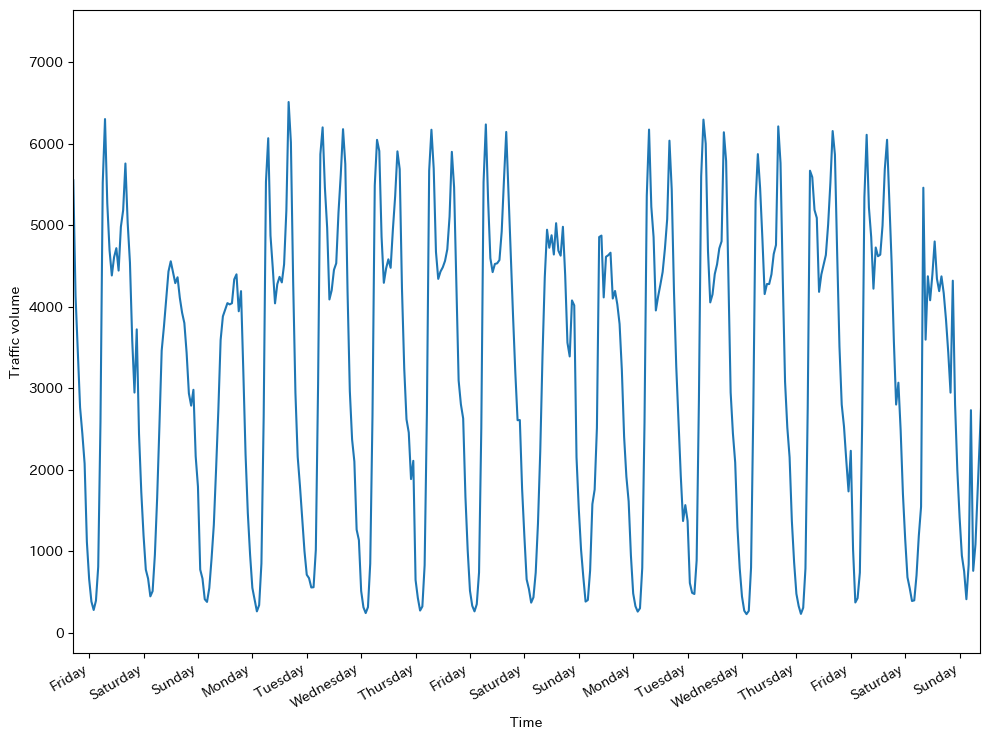

In [34]:
# 新しい図（Figure）と1つの座標軸（Axes）オブジェクトを作成
fig, ax = plt.subplots()

# 時系列データ 'traffic_volume' を折れ線グラフでプロット
ax.plot(df['traffic_volume'])

# x軸とy軸のラベルを設定
ax.set_xlabel('Time')               # x軸に「Time」と表示
ax.set_ylabel('Traffic volume')     # y軸に「Traffic volume」と表示

# x軸の目盛り位置とラベルを明示的に指定（24刻み = 1日ごと）
plt.xticks(
    np.arange(7, 400, 24),  # 目盛り位置（例えば7時開始、1日24ステップごと）
    [
        'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday',
        'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday',
        'Friday', 'Saturday', 'Sunday'  # 各位置に対応する曜日ラベル
    ]
)

# x軸の表示範囲を設定（0〜400の範囲を表示）
plt.xlim(0, 400)

# x軸のラベル（曜日）を自動で斜めに傾けて見やすく調整
fig.autofmt_xdate()

# グラフ全体のレイアウトを自動調整（ラベルなどが重ならないように）
plt.tight_layout()

ここから一日あたりの季節性があることはわかる。<br>
また、週末の交通量が少ないことから一週間あたりの季節性があることもわかる。
トレンドは一見なさそうである。<br>
また、多出力モデルの目的変数となる１時間毎の気温の可視化も可能なので季節性があるかそちらでも確認してみる。

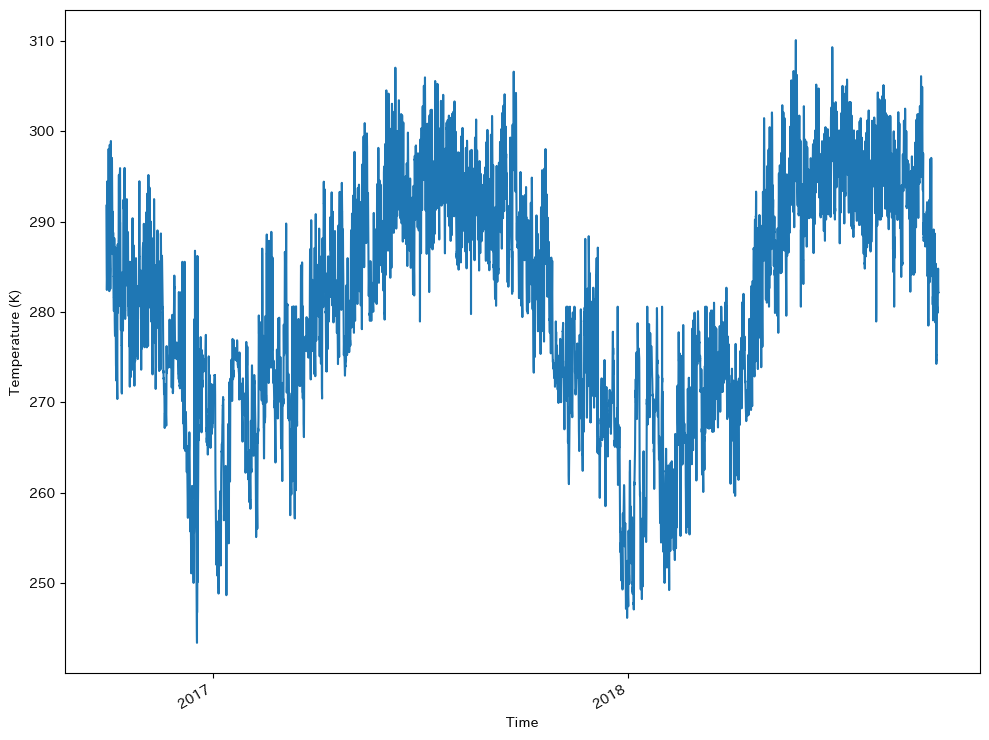

In [35]:
# 新しい図（Figure）と1つの座標軸（Axes）オブジェクトを作成
fig, ax = plt.subplots()

# 'temp' 列のデータを折れ線グラフとしてプロット
ax.plot(df['temp'])

# x軸とy軸のラベルを設定
ax.set_xlabel('Time')               # x軸ラベルに「Time」と表示
ax.set_ylabel('Temperature (K)')    # y軸ラベルに「Temperature (K)」と表示

# x軸の目盛り（ticks）とラベルを明示的に指定
# 位置 2239 と 10999 にそれぞれ「2017」「2018」と表示
plt.xticks([2239, 10999], [2017, 2018])

# x軸のラベルを自動で傾けて表示（重なり防止）
fig.autofmt_xdate()

# レイアウトを自動調整（ラベルや要素の重なりを防ぐ）
plt.tight_layout()

この図から１年毎の季節性のパターンが見られる。<br>
次に日次の季節性があるか確認。

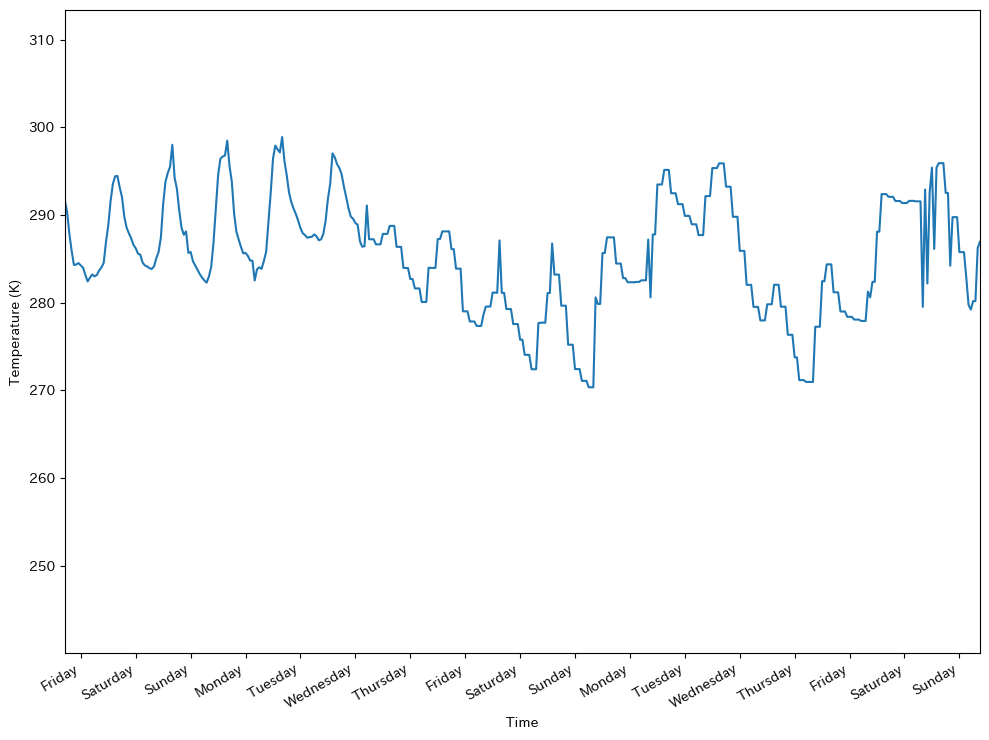

In [36]:
# 新しい図（Figure）と1つの軸（Axes）オブジェクトを作成
fig, ax = plt.subplots()

# df の 'temp' 列（気温）を折れ線グラフでプロット
ax.plot(df['temp'])

# x軸と y軸のラベルを設定
ax.set_xlabel('Time')                # x軸に「Time」と表示
ax.set_ylabel('Temperature (K)')     # y軸に「Temperature (K)」と表示

# x軸の目盛り位置（ticks）を24間隔（= 1日ごと）で設定
# 7から始めて400未満まで、24ステップごとに目盛りを打つ
plt.xticks(
    np.arange(7, 400, 24),           # 目盛り位置（インデックス）
    ['Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday',
     'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday',
     'Friday', 'Saturday', 'Sunday']  # 各位置に対応するラベル（曜日）
)

# x軸の表示範囲を 0〜400 に設定
plt.xlim(0, 400)

# x軸のラベルを自動で傾けて配置（ラベル同士の重なりを防ぐ）
fig.autofmt_xdate()

# 図の要素が重ならないようにレイアウトを自動調整
plt.tight_layout()


図から一日の始まり・終わりに低く、お昼に高いことから日次の季節性はある。

## 12.3.2

 データ探索が完了したら、特徴量エンジニアリングとデータの分割に進む。<br>
 ここではそれぞれの特徴量を分析し、モデルが交通量と１時間毎の気温を予測するのに役立つ新しい特徴量を生成する。<br>
 pandasのdescribeメソッドによってデータセットの特徴量（欠損値・平均・標準偏差・四分位数・最大値・最小値）を特定する。

In [37]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
temp,17551.0,281.416203,12.688262,243.39,272.22,282.41,291.89,310.07
rain_1h,17551.0,0.025523,0.259794,0.00,0.00,0.00,0.00,10.60
snow_1h,17551.0,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00
clouds_all,17551.0,42.034129,39.065960,0.00,1.00,40.00,90.00,100.00
traffic_volume,17551.0,3321.484588,1969.223949,113.00,1298.00,3518.00,4943.00,7280.00


**rain_1h**は第３四分位も０のためデータセット全体でほぼ０であることがわかる。したがって交通量の変化予測の説明変数としてふさわしくないと判断。<br>

**snow_1h**に関してはデータセットを通してMax,minが0のためデータセット全体で0のため説明変数として不適。

In [38]:
cols_to_drop = ['rain_1h', 'snow_1h']
df = df.drop(cols_to_drop, axis=1)

df.shape

(17551, 4)

In [39]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
temp,17551.0,281.416203,12.688262,243.39,272.22,282.41,291.89,310.07
clouds_all,17551.0,42.034129,39.065960,0.00,1.00,40.00,90.00,100.00
traffic_volume,17551.0,3321.484588,1969.223949,113.00,1298.00,3518.00,4943.00,7280.00


ここで時間をディープラーニングに利用できる特徴量に変換することを考える。
日付を秒数で表すためにtimestampメソッドを使用する。<br>

また、その後の操作で時間の周期性を取り戻すための操作をする。

In [40]:
timestamp_s = pd.to_datetime(df['date_time']).map(datetime.datetime.timestamp)

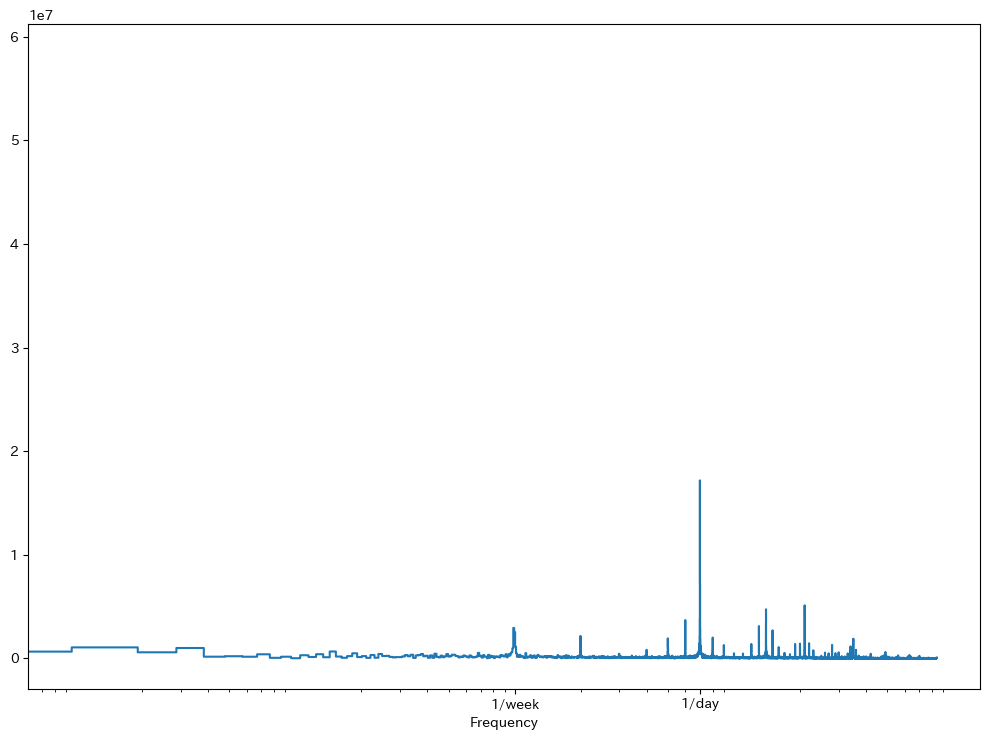

In [41]:
# 交通量の時系列データに対して高速フーリエ変換（実数信号用）を実行
fft = tf.signal.rfft(df['traffic_volume'])  # 出力は複素数（周波数成分）

# 周波数インデックス（0から始まる整数）を生成
f_per_dataset = np.arange(0, len(fft))  # len(fft) ≒ データ長 / 2 + 1

# 総サンプル数（時間ステップ数）を取得
n_sample_h = len(df['traffic_volume'])

# 1週間あたりの時間ステップ数（1日24時間 × 7日）
hours_per_week = 24 * 7

# 全データに含まれる週数（小数も可）
weeks_per_dataset = n_sample_h / hours_per_week

# 各周波数インデックスを「1週間あたりの周波数」に変換
# → f_per_week[1] = 1 → 1週間に1回の周期
f_per_week = f_per_dataset / weeks_per_dataset

# スペクトル強度（振幅）をプロット（ステップ状に描画）
plt.step(f_per_week, np.abs(fft))  # np.abs: 複素数の絶対値（振幅）

# x軸を対数スケールに変更（低周波数を強調）
plt.xscale('log')

# x軸の目盛りを設定：週1回、日1回の周期に注目
plt.xticks([1, 7], ['1/week', '1/day'])

# x軸ラベルを設定
plt.xlabel('Frequency')

# レイアウトを自動調整（重なり回避）
plt.tight_layout()

# プロットを表示
plt.show()

In [42]:
print(n_sample_h)
s=len(f_per_dataset)
print(s)

17551
8776


# FFTで何をしているのか

簡単に考えるために、離散信号

$$
x_n = \sin\left( \frac{2\pi n}{12} \right)
$$

のフーリエ変換（離散フーリエ変換：DFT）を行ったときに、大きな振幅（ピーク）が現れる周波数インデックスを数式的に解析していきます。

---

##  ステップ1：サンプル数 $N = 12$

この信号は、12サンプルごとに1周期の正弦波です。したがって、周期 $T = 12$、サンプリング点数 $N = 12$ とします。

---

##  ステップ2：DFT の定義式

離散フーリエ変換（DFT）の定義は次の通りです：

$$
X[k] = \sum_{n=0}^{N-1} x_n \cdot e^{-j \frac{2\pi}{N}kn}　　　　　
$$

(j:虚数単位)

---

##  ステップ3：信号を複素指数で展開

三角関数はオイラーの公式により以下のように表現できます：

$$
\sin\left( \frac{2\pi n}{12} \right)
= \frac{1}{2j} \left( e^{j \cdot \frac{2\pi n}{12}} - e^{-j \cdot \frac{2\pi n}{12}} \right)
= \frac{1}{2j} \left( e^{j \cdot \frac{\pi n}{6}} - e^{-j \cdot \frac{\pi n}{6}} \right)
$$

この式を $x_n$ として DFT に代入すると：

$$
X[k] = \sum_{n=0}^{N-1} \left( \frac{1}{2j} \left( e^{j \cdot \frac{\pi n}{6}} - e^{-j \cdot \frac{\pi n}{6}} \right) \right) \cdot e^{-j \cdot \frac{2\pi}{12}kn}
$$

$$
= \frac{1}{2j} \sum_{n=0}^{N-1} \left( e^{j \cdot \frac{\pi n}{6}} \cdot e^{-j \cdot \frac{2\pi kn}{12}} - e^{-j \cdot \frac{\pi n}{6}} \cdot e^{-j \cdot \frac{2\pi kn}{12}} \right)
$$

$$
= \frac{1}{2j} \sum_{n=0}^{N-1} \left( e^{j \cdot \frac{2\pi n}{12}(1 - k)} - e^{-j \cdot \frac{2\pi n}{12}(1 + k)} \right)
$$

---

##  ステップ4：最大振幅が現れる位置の同定

この式を見ると、以下のような2つの複素指数の和の形が出てきます：

$$
\sum_{n=0}^{N-1} e^{j \cdot \frac{2\pi n}{N} (1 - k)} \quad \text{と} \quad \sum_{n=0}^{N-1} e^{-j \cdot \frac{2\pi n}{N} (1 + k)}
$$

これらの和は、**幾何級数の和**に等しいですが、特に $1 - k = 0$ または $1 + k = 0$ のときに最大になります。
つまり：

* $1 - k = 0 \Rightarrow k = 1$
* $1 + k = 0 \Rightarrow k = -1$（これは DFT では $k = 11$ と等価）

---

##  結論：最大の振幅（ピーク）が出る周波数インデックス

$$
k = 1 \quad \text{および} \quad k = N - 1 = 11
$$

---

##  補足：周波数変換の対応

周波数は以下で対応付けられます：

$$
f_k = \frac{k}{N} = \frac{1}{12}, \quad \text{および} \quad f_{11} = \frac{11}{12} = -\frac{1}{12} \quad \text{（DFTでは周期性があるため）}
$$


In [43]:
# 1日の秒数（24時間 × 60分 × 60秒）
day = 24 * 60 * 60

# 1日を周期（0〜2π）と見なして、sin関数により時間帯を周期的にエンコード
# → 午前0時: sin(0)=0、正午: sin(π)=0、午後6時: sin(3π/2)=-1 など
df['day_sin'] = (np.sin(timestamp_s * (2 * np.pi / day))).values

# cos関数も使って、sinだけでは区別できない時間帯（例: 0時と12時）を区別できるようにする
# → 1日の中での位置を2次元の円上の点として表現
df['day_cos'] = (np.cos(timestamp_s * (2 * np.pi / day))).values


In [44]:
df = df.drop(['date_time'], axis=1)

df.head()

,temp,clouds_all,traffic_volume,day_sin,day_cos
0,291.75,0,5551.0,8.660254e-01,-0.500000
1,290.36,0,4132.0,7.071068e-01,-0.707107
2,287.86,0,3435.0,5.000000e-01,-0.866025
3,285.91,0,2765.0,2.588190e-01,-0.965926
4,284.31,0,2443.0,1.485292e-12,-1.000000


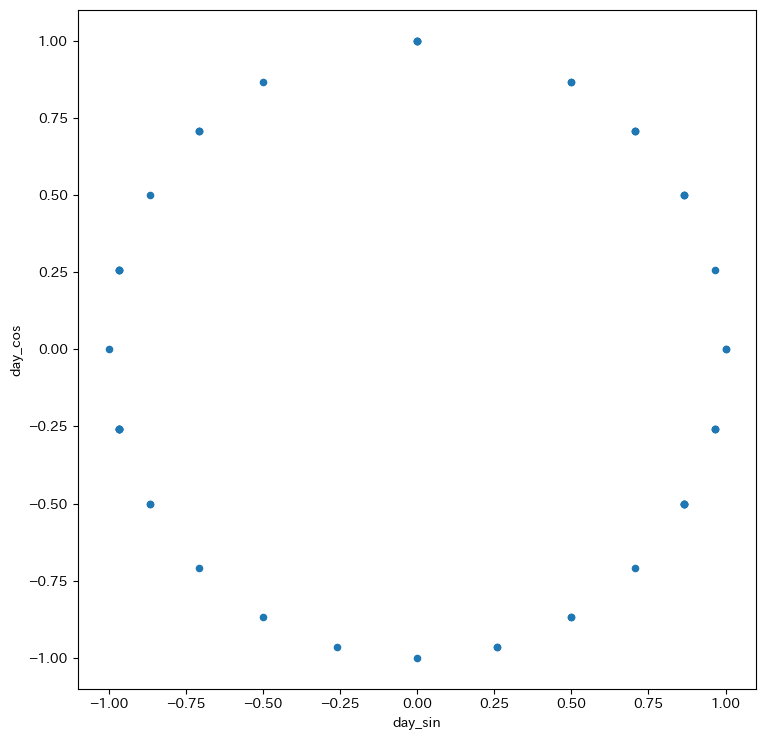

In [45]:
df.sample(50).plot.scatter('day_sin','day_cos').set_aspect('equal');
plt.tight_layout()

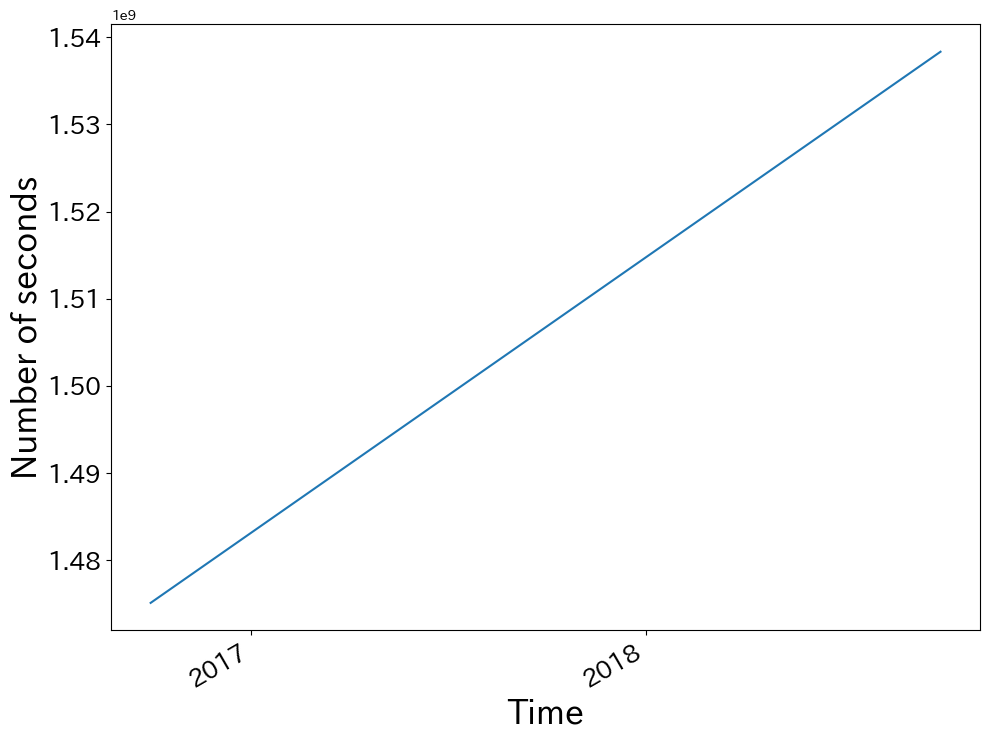

In [46]:
fig, ax = plt.subplots()

ax.plot(timestamp_s)
ax.set_xlabel('Time', fontsize=24)
ax.set_ylabel('Number of seconds', fontsize=24)

plt.xticks([2239, 10999], [2017, 2018], fontsize=18)
plt.yticks(fontsize=18)  # Y軸の目盛りラベルのフォントサイズ

fig.autofmt_xdate()
plt.tight_layout()

これにより一日の時間の周期性を保つ数値が得られたのでディープラーニングで使うことが可能となる。
日次の季節性が確認できるときは非常に使えるものである。

特徴エンジニアリングが完了したので、データを<br>
**訓練、検証、テストデータセット**に分割することができる。<br>
ここではそれぞれを7:2:1の割合で分割する。


In [47]:
n = len(df)

# Split 70:20:10 (train:validation:test)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]

train_df.shape, val_df.shape, test_df.shape

((12285, 5), (3510, 5), (1756, 5))

In [48]:
df.head()

,temp,clouds_all,traffic_volume,day_sin,day_cos
0,291.75,0,5551.0,8.660254e-01,-0.500000
1,290.36,0,4132.0,7.071068e-01,-0.707107
2,287.86,0,3435.0,5.000000e-01,-0.866025
3,285.91,0,2765.0,2.588190e-01,-0.965926
4,284.31,0,2443.0,1.485292e-12,-1.000000


データを保存する前に、すべての値が0から1の間になるようにデータをスケーリングする必要がある。これをすることでディープラーニングに必要な時間が短くなり性能が良くなる。<br>
データのスケーリングには**scikit-learnのMinMaxScaler**を使用。

In [49]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(train_df)

train_df[train_df.columns] = scaler.transform(train_df[train_df.columns])
val_df[val_df.columns] = scaler.transform(val_df[val_df.columns])
test_df[test_df.columns] = scaler.transform(test_df[test_df.columns])

#train_df.to_csv('CH1213_train.csv')
#val_df.to_csv('CH1213_val.csv')
#test_df.to_csv('CH1213_test.csv')

In [50]:
train_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
temp,12285.0,0.555681,0.196527,0.0,0.424800,0.557913,0.715072,1.0
clouds_all,12285.0,0.431034,0.393716,0.0,0.010000,0.400000,0.900000,1.0
traffic_volume,12285.0,0.445735,0.273635,0.0,0.165899,0.473141,0.671271,1.0
day_sin,12285.0,0.499881,0.353528,0.0,0.146447,0.500000,0.853553,1.0
day_cos,12285.0,0.500000,0.353607,0.0,0.146447,0.500000,0.853553,1.0


**データの正規化**と**スケーリング**の違い

**正規化**：データの尺度と分布に影響を与える（強制的にガウス分布になる）<br>

**スケーリング**：データの尺度のみに影響を与え、分布には影響を与えない。強制的に特定の範囲の値にする。<br>

最後に各データセットをcsvファイルに保存。

In [51]:
train_df.to_csv('train.csv')
val_df.to_csv('val.csv')
test_df.to_csv('test.csv')
test_df

,temp,clouds_all,traffic_volume,day_sin,day_cos
15795,0.767405,0.90,0.401563,0.629410,0.017037
15796,0.756876,0.90,0.348821,0.500000,0.000000
15797,0.754833,0.90,0.302637,0.370590,0.017037
15798,0.754833,0.90,0.187108,0.250000,0.066987
15799,0.756247,0.90,0.080926,0.146447,0.146447
...,...,...,...,...,...
17546,0.629577,0.75,0.478582,0.750000,0.066987
17547,0.618733,0.90,0.372262,0.629410,0.017037
17548,0.618262,0.90,0.285475,0.500000,0.000000
17549,0.608204,0.90,0.186549,0.370590,0.017037


# 12.4

本章では、予測にディープラーニングを使うことに目を向け、３種類のモデルについて軽く話した。次章からこの３つのモデルをベースラインモデルとして使う。また、構築できるうち最も簡単な線形モデルと、隠れ層を持つディープニューラルネットワークも実装する。

# 第１３章

ディープラーニングのためのデータウィンドウとベースラインの作成

- **データウィンドウを作成する**
- **ディープラーニングのベースモデルを実装する**

前章では時系列予測のためのディープラーニングを紹介した。<br>
そしてデータ探索と特徴量エンジニアリングに進み、交通量予測に役立つ特徴量を作成した。<br>

本章では、データウィンドウを作成する再利用可能なクラスを構築する。<br>
このステップが最も複雑で最もためになるトピック。

---

##  なぜ「最も複雑」なのか？

### 1. 時系列データの性質が特殊

* 他のデータとは異なり、**順序性(時間依存性)**が強いため、適当に分割しては意味をなさない。
* 未来の値を予測するには、過去の適切な長さ・範囲のデータを抽出する必要がある（→「ウィンドウ」の設計が必要）。

### 2. パラメータの選定が難しい

* 入力ウィンドウの長さ（例：過去30日）や、予測対象の範囲（例：1日後 or 7日後）を選ぶ必要があるが、**ドメイン知識や経験則**が必要。
* 未来をどれだけ予測するか（single-step or multi-step）によって入力形式も変わる。

### 3. 教師データ（ラベル）の自動生成が複雑

* 通常の分類・回帰タスクと異なり、**教師データを時系列の中から自動で抽出**する必要がある。
* 例：過去7日分のデータから翌日の気温を予測するなら、すべてのスライディングウィンドウに対応するラベルを作る必要がある。

### 4. 欠損値・異常値・非定常性への対処

* 実際のデータはノイズや欠損が多く、「きれいな」ウィンドウを作るためには前処理も組み込む必要がある。

--- 

予測にディープラーニングを適用するには適切な時間ウィンドウを作成し入力とラベルを指定する必要がある。<br>

この部分が完成すると様々なモデルの実装が簡単になり、枠組みを様々な状況やデータセットに再利用できるようになる。

---

##  なぜ「実装が簡単になり再利用可能」なのか？

### 1. ウィンドウ生成処理の**自動化と抽象化**

* このクラスが一度完成すれば、「ウィンドウ作成→入力とラベルを分割→モデルに渡す」までが統一された処理として扱える。
* モデル開発者は**ネットワーク構造だけに集中できる**ようになる。

### 2. 様々なモデル形式に対応可能

* LSTM、Transformer、1D-CNN、さらにはSeq2Seqなど、どのアーキテクチャでも「入力と出力のペア」が必要。
* 入力形式（例：`(batch_size, time_steps, features)`）が統一されるため、**モデルの切り替えが容易**。

### 3. 様々な状況（タスク）に転用可能

* 気温予測、株価予測、需要予測など、多種多様な時系列タスクにそのまま流用可能。
* 必要なのはデータとパラメータ設定の変更だけ。

---

データウィンドウをどのように作成するのか理解したら、<br>
**ベースラインモデル**、**線形モデル**、**ディープニューラルネットワーク**の実装に進む。<br>

それらによりモデルの性能を計測できるようになり、以降の章でさらに複雑なアーキテクチャに取り組めるようになる。<br>
（**アーキテクチャ**：ニューラルネットワークの内部構造、すなわち「どのような層をどう組み合わせているか」というモデルの設計のこと。）

## 13.1 データウィンドウを作成する

まず、DataWindowクラスを生成。このクラスを使うとデータをディープラーニングに入力として与えるのに適したフォーマットにできる。次にこのクラスにプロットメゾットを追加して、予測値と実測値を可視化できるようにする。<br>

いきなりクラスの構築に取り掛かるのではなくディープラーニングのためにデータウィンドウを処理しなければいけない理由を理解する。<br>
次項で説明するが、ディープラーニングモデルをデータに適応させる方法は独特。<br>
その後にDataWindowクラスの実装に進む。

---

## 13.1.1

第１１章まででSARIMAXなどの統計学的モデルを訓練データに適合させ予測値を生成した。<br>
具体的には事前に定義した$(p,d,q)(P,D,Q)_m$の関数に適合させて最も適合する次数を突き止めた。<br>

ディープラーニングモデルでは、一連の関数を試すのではなく入力が渡されたらできるだけ良い予測値を生成するような関数をニューラルネットワークに独自に生成させる。
| 観点      | 統計モデル（SARIMAXなど）      | ディープラーニングモデル                       |
| ------- | --------------------- | ---------------------------------- |
| モデルの構造  | あらかじめ定義された形（AR, MAなど） | ニューラルネットワークが柔軟に構造を学習               |
| 次数などの設定 | \$p,d,q\$などを試行錯誤で決定   | モデルの深さやユニット数は事前に設定するが、学習で構造が最適化される |
| 入力の使い方  | 連続データ全体を使ってモデルに適合     | データを**ウィンドウ化**して、入力・ラベルのペアを大量に作る   |
| 目的      | 時系列の特徴に合う**パラメータ**を推定 | 最もよい**関数そのもの**をデータから学習             |
| 柔軟性     | 比較的限定的                | 高い（非線形、長期依存性も表現可能）                 |

この作業を可能にするために**データウィンドウ処理**を実行する。この処理は、時系列でデータ点のシーケンスを定義し、どれが入力で、どれがラベルなのかを明確にさせるプロセス。
ディープラーニングモデルに入力を適合させ、予測値を生成し、それをラベル（目的変数）と比較。予測値の正解率をそれ以上改善できなくなるまでこのプロセスを繰り返す。
データウィンドウの例で考える。このデータウィンドウは24時間分のデータを用いて次の24時間のモデルを予測する。


DataWindowクラスは、入力の幅、ラベルの幅、シフトに基づいている。

1. **入力の幅**：予測値を生成する為にモデルに入力として渡される時間ステップの数

ex)データセットに１時間毎のデータが含まれていて予測値を生成するために24時間分のデータをモデルに与える場合の入力の幅は24になる。
   
3. **ラベルの幅**：予測での時間ステップ(何個tを予測するのか)

ex)時間ステップを1つだけ予測する時ラベルの幅は1。1日分の時ラベルの幅は24<br>

5. **シフト**：入力と予測がどれくらい離れているかを時間ステップで表したもの。<br>


ex)*次の*時間ステップを予測するとき、シフトは１

---

## 🔶 例1：`shift=1`, `input_width=24`, `label_width=1`

```
時間軸:   t-23 t-22 ...      t-2 t-1  → t   t+1 ...
            |    |             |  |    |   
入力:     [--------- 入力: 過去24時間 -]     
                                      ↑
                                   シフト:1
                                      ↓
ラベル:                                [t]
```

* ✅ 過去24時間（t-23〜t-1）を入力にして
* ✅ 直後1時間（t）を予測

---

## 🔶 例2：`shift=24`, `input_width=24`, `label_width=1`

```
時間軸:   t-47 t-46 ...     t-25 t-24     →        t-1 t   t+1 ...
            |    |             |   |                        |   
入力:     [-- 入力: t-47〜t-24 ------]     
                                      ↑
                                 　[シフト:24]
　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　  ↓
ラベル:                                     　　　　　　[t]
```

* ✅ t-47〜t-24 の過去データを使い
* ✅ 24時間先の t を予測

---

## 🔶 例3：`shift=1`, `input_width=24`, `label_width=24`

```
時間軸:   t-23 t-22 ...    t-2 t-1  →  t  t+1 ...          t+23 t+24
            |    |            |  |     |   |                  |
入力:     [--- 入力: 過去24時間 ---]     
                                      ↑
                                  シフト:1
                                      ↓
ラベル:                                [------- 未来24時間 -------]
```

* ✅ 過去24時間を使って
* ✅ すぐ後の未来24時間（t〜t+23）を一括予測

---

## 📌 まとめ表（パラメータの違い）

| 例 | `input_width` | `shift` | `label_width` | ラベル位置  |
| - | ------------- | ------- | ------------- | ------ |
| 1 | 24            | 1       | 1             | t      |
| 2 | 24            | 24      | 1             | t      |
| 3 | 24            | 1       | 24            | t〜t+23 |


## 13.1.2

DataWindowクラス実装の準備ができたので、まずは実装の前に訓練データセット、検証データセット、テストデータセットを読み込む。

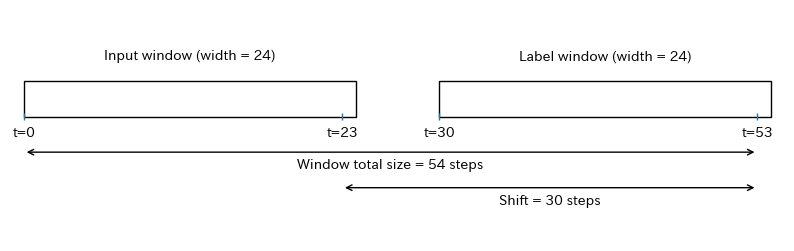

In [52]:
from matplotlib.patches import Rectangle

# Parameters
input_width = 24
label_width = 24
shift = 30  # shift from end of input to end of label
label_end = (input_width - 1) + shift
label_start = label_end - (label_width - 1)
window_total = label_end + 1  # inclusive steps

# Create figure
fig, ax = plt.subplots(figsize=(10, 3))
ax.set_xlim(-1, window_total + 1)
ax.set_ylim(-2.5, 4)
ax.axis('off')

# Draw input and label windows
ax.add_patch(Rectangle((0, 1), input_width, 1, fill=False))
ax.add_patch(Rectangle((label_start, 1), label_width, 1, fill=False))

# Labels above rectangles
ax.text(input_width / 2, 2.5, f'Input window (width = {input_width})', ha='center', va='bottom')
ax.text(label_start + label_width / 2, 2.5, f'Label window (width = {label_width})', ha='center', va='bottom')

# Tick markers and labels
ticks = [
    (0, 't=0'),
    (input_width - 1, f't={input_width - 1}'),
    (label_start, f't={label_start}'),
    (label_end, f't={label_end}')
]
for x, label in ticks:
    ax.vlines(x, 0.9, 1.1, linewidth=1)
    ax.text(x, 0.7, label, ha='center', va='top')

# Window total span arrow (moved further down)
ax.annotate('', xy=(0, 0), xytext=(label_end, 0), arrowprops=dict(arrowstyle='<->'))
ax.text(label_end / 2, -0.2, f'Window total size = {window_total} steps', ha='center', va='top')

# Shift arrow (below total span, further down)
ax.annotate('', xy=(input_width - 1, -1), xytext=(label_end, -1), arrowprops=dict(arrowstyle='<->'))
ax.text((input_width - 1 + label_end) / 2, -1.2, f'Shift = {shift} steps', ha='center', va='top')

plt.show()

In [53]:
class DataWindow():
    def __init__(self, input_width, label_width, shift,
                 train_df=train_df, val_df=val_df, test_df=test_df,stride=1,shuffle=True,label_columns=None):

        self.train_df = train_df
        self.val_df = val_df
        self.test_df = test_df

        self.label_columns = label_columns
        if label_columns is not None:
            self.label_columns_indices = {name: i for i, name in enumerate(label_columns)}

        self.column_indices = {name: i for i, name in enumerate(train_df.columns)}

        self.input_width = input_width
        self.label_width = label_width
        self.shift = shift
        self.stride=stride
        self.shuffle=shuffle

        self.total_window_size = input_width + shift

        self.input_slice = slice(0, input_width)
        self.input_indices = np.arange(self.total_window_size)[self.input_slice]

        self.label_start = self.total_window_size - self.label_width
        self.labels_slice = slice(self.label_start, self.total_window_size)
        self.label_indices = np.arange(self.total_window_size)[self.labels_slice]
        
        
    def split_to_inputs_labels(self, features):
        inputs = features[:, self.input_slice, :]
        labels = features[:, self.labels_slice, :]
        if self.label_columns is not None:
            labels = tf.stack(
                [labels[:,:,self.column_indices[name]] for name in self.label_columns],
                axis=-1
            )
        inputs.set_shape([None, self.input_width, None])
        labels.set_shape([None, self.label_width, None])

        return inputs, labels

    def plot(self, plot_col='y', max_subplots=3):
        inputs, labels = self.sample_batch

        plt.figure(figsize=(9, 6))
        plot_col_index = self.column_indices[plot_col]
        max_n = min(max_subplots, len(inputs))

        for n in range(max_n):
            plt.subplot(3, 1, n+1)
            plt.ylabel(f'{plot_col} [scaled]')
            plt.plot(self.input_indices, inputs[n, :, plot_col_index],
                     label='Inputs', marker='.', zorder=-10)

            if self.label_columns:
              label_col_index = self.label_columns_indices.get(plot_col, None)
            else:
              label_col_index = plot_col_index

            if label_col_index is None:
              continue

            plt.scatter(self.label_indices, labels[n, :, label_col_index],
                        edgecolors='k', marker='s', label='Labels', c='green', s=64)

            if n == 0:
              plt.legend()

        plt.xlabel('Time (h)')

    def make_dataset(self, data):
        data = np.array(data, dtype=np.float32)
        shuffle = self.shuffle
        ds = tf.keras.preprocessing.timeseries_dataset_from_array(
            data=data,
            targets=None,
            sequence_length=self.total_window_size,
            sequence_stride=self.stride,# ← スライド幅はstride
            shuffle=shuffle,
            batch_size=32
        )

        ds = ds.map(self.split_to_inputs_labels)
        return ds

    @property
    def train(self):
        return self.make_dataset(self.train_df)

    @property
    def val(self):
        return self.make_dataset(self.val_df)

    @property
    def test(self):
        return self.make_dataset(self.test_df)

    @property
    def sample_batch(self):
        result = getattr(self, '_sample_batch', None)
        if result is None:
            result = next(iter(self.train))
            #tf.data.Datasetから最初の1バッチだけ取り出す一般的な方法です。
            self._sample_batch = result
        return result

In [54]:
# -----------------------
# 1. ダミーの時系列データ
# -----------------------
# 時系列データ（例: sin 波）を作成
t = np.arange(80)
y = np.sin(2*np.pi*t/12) + 0.0 * np.random.randn(80)
df = pd.DataFrame({'t':t,'y': y})

# 学習・検証・テスト用に分割
train_df = df[:30]
val_df = df[30:55]
test_df = df[55:]

train_df.head()

,t,y
0,0,0.000000
1,1,0.500000
2,2,0.866025
3,3,1.000000
4,4,0.866025


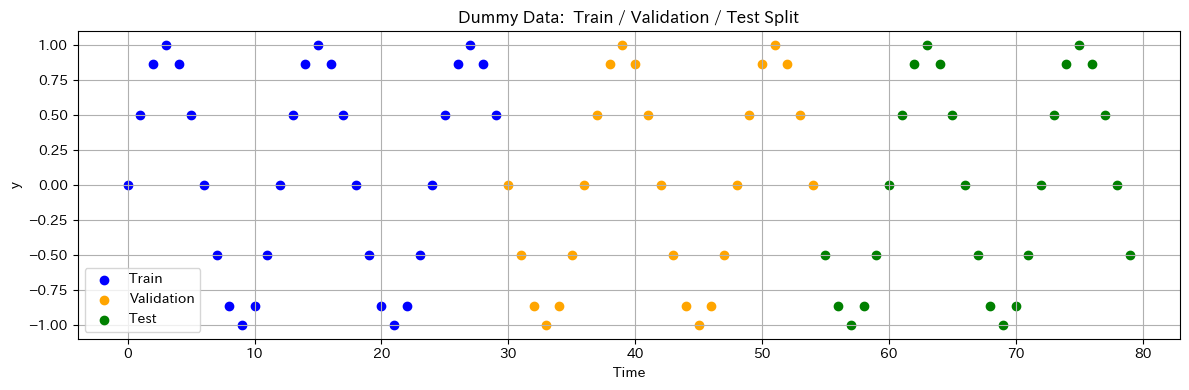

In [55]:
# プロット
plt.figure(figsize=(12, 4))
plt.scatter(train_df.index, train_df['y'], label='Train', color='blue')
plt.scatter(val_df.index, val_df['y'], label='Validation', color='orange')
plt.scatter(test_df.index, test_df['y'], label='Test', color='green')

plt.xlabel("Time")
plt.ylabel("y")
plt.title("Dummy Data:  Train / Validation / Test Split")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

- train_dfは長さ30
- stride=1の場合、長さ24のWindowは7個

- test_df,val_dfは長さ25
- stride=1の場合、長さ24のWindowは2個

はい、これは**時系列ウィンドウ生成の仕組み**に関する内容で、特に以下の設定：

* `input_width = 24`（1ウィンドウあたり24時間分）
* `stride = 1`（1ステップずつずらしてウィンドウを切る）
* `train_df`, `val_df`, `test_df` はそれぞれデータの長さを表す

これらを使って、「何個のウィンドウが切れるか」を考えています。

---

## ：ウィンドウ切り出しの仕組み

時系列データの長さを $L$、ウィンドウの幅を $W$、ストライドを $S$ としたときに、**生成できるウィンドウの個数 $N$** は以下で計算できます：

$$
N = \left\lfloor \frac{L - W}{S} \right\rfloor + 1
$$

---

##  例1：`train_df` 長さ = 30、`input_width` = 24、`stride` = 1

$$
N = \left\lfloor \frac{30 - 24}{1} \right\rfloor + 1 = \lfloor 6 \rfloor + 1 = 7
$$

* 最初のウィンドウは `df[0:24]`
* 2番目は `df[1:25]`
* …
* 最後のウィンドウは `df[6:30]`

→ **7個のウィンドウが作れる**

---

##  例2：`test_df` or `val_df` 長さ = 25、`input_width` = 24、`stride` = 1

$$
N = \left\lfloor \frac{25 - 24}{1} \right\rfloor + 1 = \lfloor 1 \rfloor + 1 = 2
$$

→ **2個のウィンドウが作れる**

* `df[0:24]`
* `df[1:25]`

---

##  ポイント

| 項目               | 意味                           |
| ---------------- | ---------------------------- |
| データ長がウィンドウ幅と同じ   | ウィンドウ1個しか作れない（開始位置0のみ）       |
| データ長 < ウィンドウ幅    | ウィンドウを1つも作れない                |
| `stride` を大きくすると | ウィンドウ数が減る（例：stride=2 → 3個など） |
| `stride=1`       | 最も細かくスライドして多くのウィンドウを生成       |

---

##  この情報の用途

このウィンドウ数の計算は、以下に重要です：

* 学習に使えるデータ数の見積もり
* バッチサイズの選定
* 過学習の回避（データ数が少なすぎる場合）


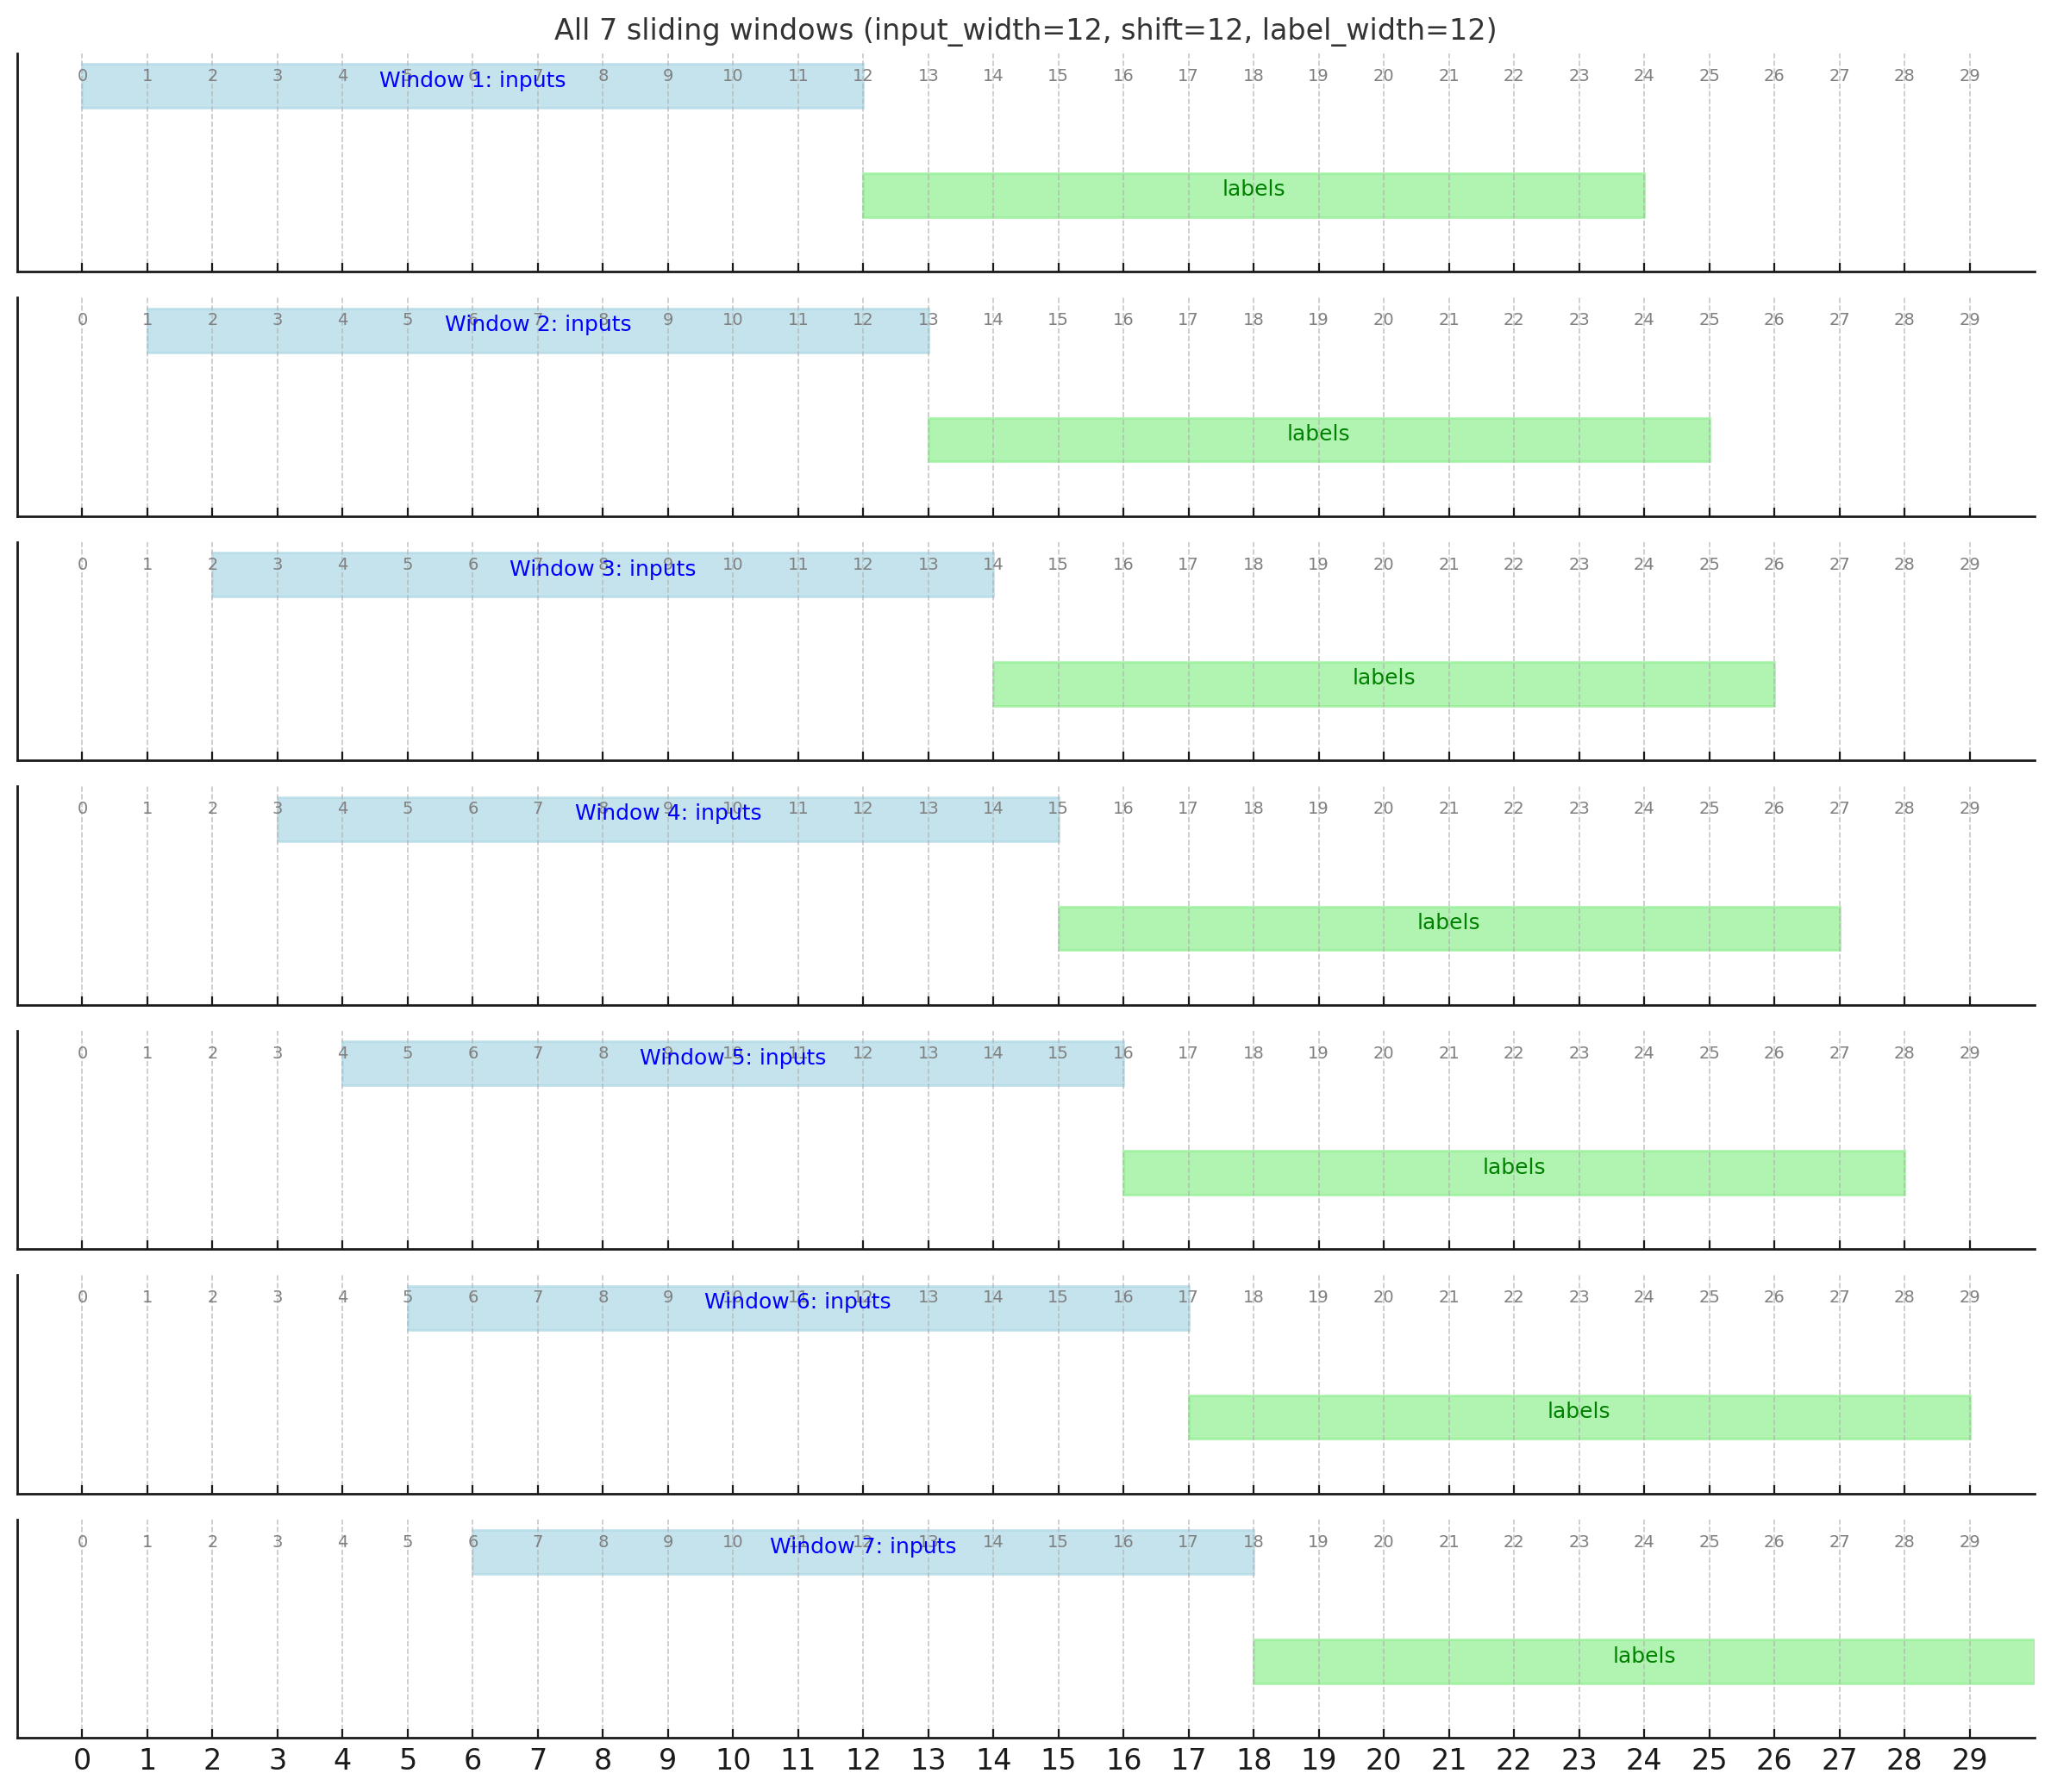

In [56]:
#コード５
# ----------------------------
# 2. DataWindow のインスタンス化
# ----------------------------
w = DataWindow(input_width=12,label_width=12,shift=12,stride=1,shuffle=False,
    train_df=train_df,val_df=val_df,test_df=test_df,
    label_columns=['y'])

In [66]:
# ----------------------------
# 3. データウィンドウの確認
# ----------------------------
print("input_width:", w.input_width)
print("label_width:", w.label_width)
print("shift:", w.shift)
print("stride:", w.stride)
print("shuffle:", w.shuffle)
print("total_window_size:", w.total_window_size)
print("input_indices:", w.input_indices)
print("label_indices:", w.label_indices)
print("label_columns:", w.label_columns)
print("column_indices:", w.column_indices)

#確認
print(train_df.shape)
print(val_df.shape)
print(test_df.shape)

input_width: 12
label_width: 12
shift: 12
stride: 1
shuffle: False
total_window_size: 24
input_indices: [ 0  1  2  3  4  5  6  7  8  9 10 11]
label_indices: [12 13 14 15 16 17 18 19 20 21 22 23]
label_columns: ['y']
column_indices: {'t': 0, 'y': 1}
(30, 2)
(25, 2)
(25, 2)


In [67]:
#可視化用にsample_batchを一つ保持
inputs, labels = w.sample_batch
print("inputs shape:", inputs.shape)#(バッチサイズ、入力ウィンドウの長さ、特徴量数)
print("labels shape:", labels.shape)#(バッチサイズ、ラベルウィンドウの長さ、特徴量数)
# 最初の1サンプルを表示(Window 1)
print("inputs[0] shape:", inputs[0].shape)
print("labels[0] shape:", labels[0].shape)
print("inputs[0]:", inputs[0])
print("labels[0]:", labels[0])

inputs shape: (7, 12, 2)
labels shape: (7, 12, 1)
inputs[0] shape: (12, 2)
labels[0] shape: (12, 1)
inputs[0]: tf.Tensor(
[[ 0.0000000e+00  0.0000000e+00]
 [ 1.0000000e+00  5.0000000e-01]
 [ 2.0000000e+00  8.6602539e-01]
 [ 3.0000000e+00  1.0000000e+00]
 [ 4.0000000e+00  8.6602539e-01]
 [ 5.0000000e+00  5.0000000e-01]
 [ 6.0000000e+00  1.2246469e-16]
 [ 7.0000000e+00 -5.0000000e-01]
 [ 8.0000000e+00 -8.6602539e-01]
 [ 9.0000000e+00 -1.0000000e+00]
 [ 1.0000000e+01 -8.6602539e-01]
 [ 1.1000000e+01 -5.0000000e-01]], shape=(12, 2), dtype=float32)
labels[0]: tf.Tensor(
[[-2.4492937e-16]
 [ 5.0000000e-01]
 [ 8.6602539e-01]
 [ 1.0000000e+00]
 [ 8.6602539e-01]
 [ 5.0000000e-01]
 [ 3.6739403e-16]
 [-5.0000000e-01]
 [-8.6602539e-01]
 [-1.0000000e+00]
 [-8.6602539e-01]
 [-5.0000000e-01]], shape=(12, 1), dtype=float32)


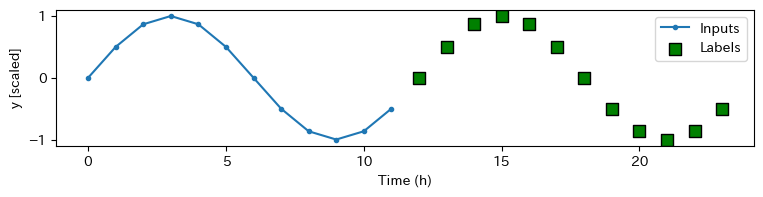

In [68]:
# ----------------------------
# 4. 可視化テスト（モデルなし）
# ----------------------------
w.plot(plot_col='y',max_subplots=1)

In [69]:
# 1番目の最初の1サンプルを表示(Window 1)
print("inputs[0]:", inputs[0, :, :])
print("labels[0]:", labels[0, :, :])

inputs[0]: tf.Tensor(
[[ 0.0000000e+00  0.0000000e+00]
 [ 1.0000000e+00  5.0000000e-01]
 [ 2.0000000e+00  8.6602539e-01]
 [ 3.0000000e+00  1.0000000e+00]
 [ 4.0000000e+00  8.6602539e-01]
 [ 5.0000000e+00  5.0000000e-01]
 [ 6.0000000e+00  1.2246469e-16]
 [ 7.0000000e+00 -5.0000000e-01]
 [ 8.0000000e+00 -8.6602539e-01]
 [ 9.0000000e+00 -1.0000000e+00]
 [ 1.0000000e+01 -8.6602539e-01]
 [ 1.1000000e+01 -5.0000000e-01]], shape=(12, 2), dtype=float32)
labels[0]: tf.Tensor(
[[-2.4492937e-16]
 [ 5.0000000e-01]
 [ 8.6602539e-01]
 [ 1.0000000e+00]
 [ 8.6602539e-01]
 [ 5.0000000e-01]
 [ 3.6739403e-16]
 [-5.0000000e-01]
 [-8.6602539e-01]
 [-1.0000000e+00]
 [-8.6602539e-01]
 [-5.0000000e-01]], shape=(12, 1), dtype=float32)


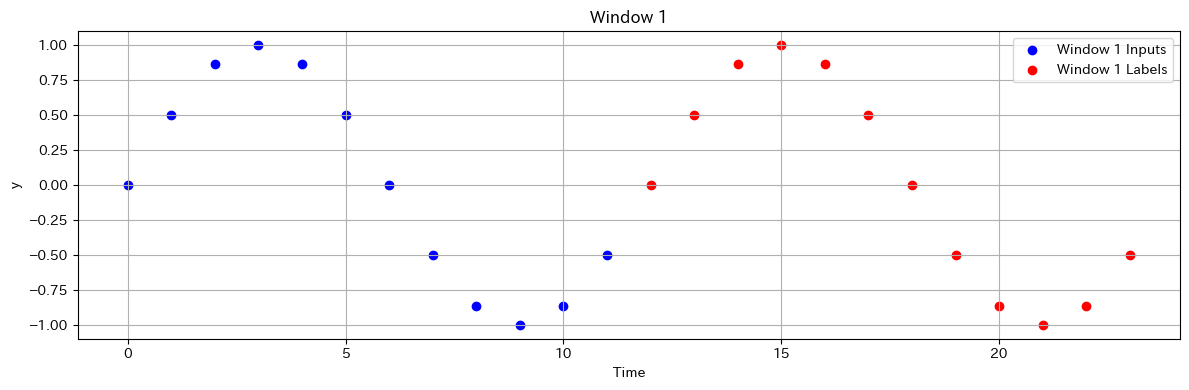

In [74]:
# Window 1のプロット
plt.figure(figsize=(12, 4))
plt.scatter(inputs[0, :,0],inputs[0, :,1], label='Window 1 Inputs', color='blue')
plt.scatter(inputs[0, :,0]+w.input_width,labels[0, :,0], label='Window 1 Labels', color='red')
plt.xlabel("Time")
plt.ylabel("y")
plt.title("Window 1")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [71]:
# 2番目の最初の1サンプルを表示(Window 2)
print("inputs[1]:", inputs[1, :, :])
print("labels[1]:", labels[1, :, :])

inputs[1]: tf.Tensor(
[[ 1.0000000e+00  5.0000000e-01]
 [ 2.0000000e+00  8.6602539e-01]
 [ 3.0000000e+00  1.0000000e+00]
 [ 4.0000000e+00  8.6602539e-01]
 [ 5.0000000e+00  5.0000000e-01]
 [ 6.0000000e+00  1.2246469e-16]
 [ 7.0000000e+00 -5.0000000e-01]
 [ 8.0000000e+00 -8.6602539e-01]
 [ 9.0000000e+00 -1.0000000e+00]
 [ 1.0000000e+01 -8.6602539e-01]
 [ 1.1000000e+01 -5.0000000e-01]
 [ 1.2000000e+01 -2.4492937e-16]], shape=(12, 2), dtype=float32)
labels[1]: tf.Tensor(
[[ 5.0000000e-01]
 [ 8.6602539e-01]
 [ 1.0000000e+00]
 [ 8.6602539e-01]
 [ 5.0000000e-01]
 [ 3.6739403e-16]
 [-5.0000000e-01]
 [-8.6602539e-01]
 [-1.0000000e+00]
 [-8.6602539e-01]
 [-5.0000000e-01]
 [-4.8985874e-16]], shape=(12, 1), dtype=float32)


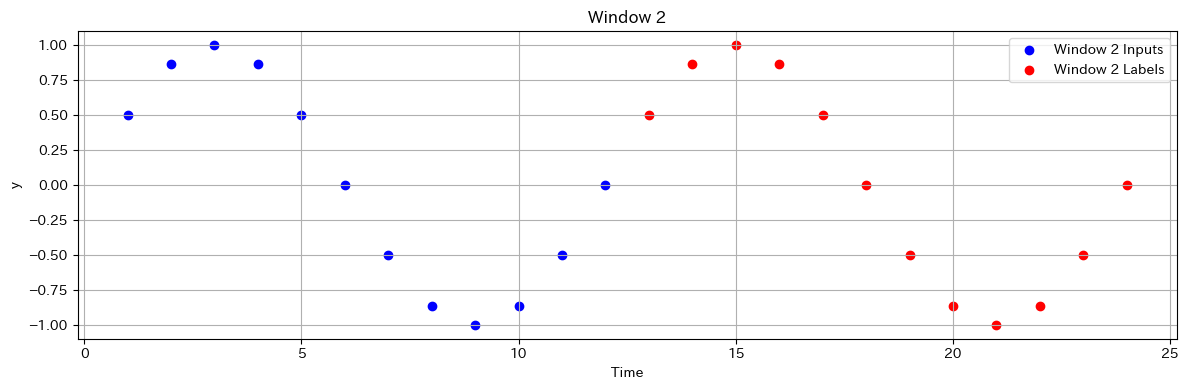

In [72]:
# Window 2のプロット
plt.figure(figsize=(12, 4))
plt.scatter(inputs[1, :,0],inputs[1, :,1], label='Window 2 Inputs', color='blue')
plt.scatter(inputs[1, :,0]+w.input_width,labels[1, :,0], label='Window 2 Labels', color='red')
plt.xlabel("Time")
plt.ylabel("y")
plt.title("Window 2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [73]:
# 7番目の最初の1サンプルを表示(Window 7)
print("inputs[6]:", inputs[6, :, :])
print("labels[6]:", labels[6, :, :])

inputs[6]: tf.Tensor(
[[ 6.0000000e+00  1.2246469e-16]
 [ 7.0000000e+00 -5.0000000e-01]
 [ 8.0000000e+00 -8.6602539e-01]
 [ 9.0000000e+00 -1.0000000e+00]
 [ 1.0000000e+01 -8.6602539e-01]
 [ 1.1000000e+01 -5.0000000e-01]
 [ 1.2000000e+01 -2.4492937e-16]
 [ 1.3000000e+01  5.0000000e-01]
 [ 1.4000000e+01  8.6602539e-01]
 [ 1.5000000e+01  1.0000000e+00]
 [ 1.6000000e+01  8.6602539e-01]
 [ 1.7000000e+01  5.0000000e-01]], shape=(12, 2), dtype=float32)
labels[6]: tf.Tensor(
[[ 3.6739403e-16]
 [-5.0000000e-01]
 [-8.6602539e-01]
 [-1.0000000e+00]
 [-8.6602539e-01]
 [-5.0000000e-01]
 [-4.8985874e-16]
 [ 5.0000000e-01]
 [ 8.6602539e-01]
 [ 1.0000000e+00]
 [ 8.6602539e-01]
 [ 5.0000000e-01]], shape=(12, 1), dtype=float32)


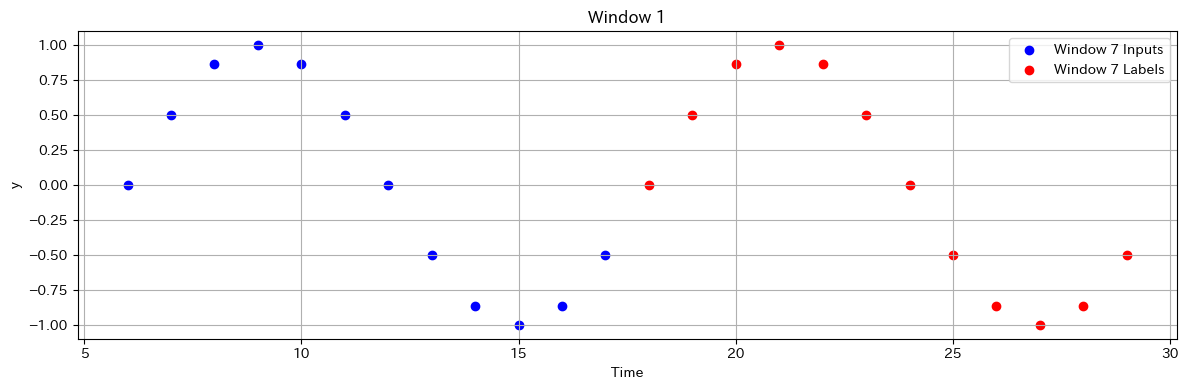

In [78]:
# Window ７のプロット
plt.figure(figsize=(12, 4))
plt.scatter(inputs[6, :,0],inputs[0, :,1], label='Window 7 Inputs', color='blue')
plt.scatter(inputs[6, :,0]+w.input_width,labels[0, :,0], label='Window 7 Labels', color='red')
plt.xlabel("Time")
plt.ylabel("y")
plt.title("Window 1")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## 13.2  Baseline models

---

DataWindowを使用する。ベースラインモデルをシングルステップモデル、マルチステップモデル、多出力モデルとして実装する。実装自体は似ているのでデータウィンドウがうまく実装されて入れば単純であることがわかる。
ベースラインモデルはより複雑なモデルの評価基準として使われる。モデルの性能が良いと判断されるのは別のモデルに劣らない場合である。つまり、ベースラインモデルの構築はモデル化の重要なステップである。

---

#### 仕様

- label_index:目的変数のindexを指定

- label_indexはスカラー（目的変数が一つ） or　リスト（目的変数が複数）

- forecast_horizon:逐次予測の1回で予測するステップ数

- input_width:Input Windowのステップ数

- mode : Baselineモデルの予測方法を指定

- "last" :Input Windowの最後の値でをforecast_horizonくり返して予測

- "mean" :Input Windowの平均値でをforecast_horizonくり返して予測

- "repeat": Input Windowの入力をくり返す。(forecast_horizon=input_width)

In [79]:
class BaselineModel(Model):
    def __init__(self, label_index, mode="last", forecast_horizon=1, input_width=None):
        """
        Multi-step対応ベースラインモデル（last,mean,repeat対応）

        Parameters:
        - label_index : int or list[int]
            予測対象の特徴量のインデックス
        - mode : 'last', 'mean', 'repeat'
        - forecast_horizon : int
            予測ステップ数（ラベル幅）
        - input_width : int or None
            入力ウィンドウ幅（repeatモードでは必須）
        """
        super().__init__()
        if label_index is None:
            raise ValueError("label_index must be specified explicitly.")
        if mode == "repeat" and input_width != forecast_horizon:
            raise ValueError("In 'repeat' mode, input_width must equal forecast_horizon.")

        self.label_index = label_index
        self.mode = mode
        self.forecast_horizon = forecast_horizon
        self.input_width = input_width

    def call(self, inputs):
        batch_size = tf.shape(inputs)[0]

        if isinstance(self.label_index, list):
            indices = self.label_index
        else:
            indices = [self.label_index]

        if self.mode == "last":
            last_values = tf.concat([inputs[:, -1:, i:i+1] for i in indices], axis=-1)
            return tf.tile(last_values, [1, self.forecast_horizon, 1])

        elif self.mode == "mean":
            mean_values = tf.concat([
                tf.reduce_mean(inputs[:, :, i:i+1], axis=1, keepdims=True)
                for i in indices
            ], axis=-1)
            return tf.tile(mean_values, [1, self.forecast_horizon, 1])

        elif self.mode == "repeat":
            # 形状：(batch, input_width, n_features) → (batch, forecast_horizon, n_features)
            repeated_values = tf.concat([inputs[:, :, i:i+1] for i in indices], axis=-1)
            return repeated_values  # 必ず forecast_horizon == input_width の前提

        else:
            raise ValueError("mode must be 'last', 'mean', or 'repeat'")


### 1 Single-step baseline models

「直近の過去データを使って、次の1ステップだけを予測する時系列モデル」

今回は直近1コのデータなのでlast=mean=repeatになるからlastだけで考える。

In [76]:
# ----------------------------
# DataWindow のインスタンス化
# ----------------------------
w = DataWindow(input_width=1,label_width=1,shift=1,stride=1,shuffle=False,
    train_df=train_df,val_df=val_df,test_df=test_df,
    label_columns=['y'])

In [77]:
#データウィンドウの確認
print("input_width:", w.input_width)
print("label_width:", w.label_width)
print("shift:", w.shift)
print("stride:", w.stride)
print("total_window_size:", w.total_window_size)
print("input_indices:", w.input_indices)
print("label_indices:", w.label_indices)
print("label_columns:", w.label_columns)
print("column_indices:", w.column_indices)


input_width: 1
label_width: 1
shift: 1
stride: 1
total_window_size: 2
input_indices: [0]
label_indices: [1]
label_columns: ['y']
column_indices: {'t': 0, 'y': 1}


In [78]:
baseline_last = BaselineModel(label_index=1, mode="last", forecast_horizon=1, input_width=1)
baseline_last.compile(loss=MeanSquaredError(), metrics=[MeanAbsoluteError()])

### 予測・評価表法

✅ 方法①：モデルで直接予測（.predict() を使う）

```
predictions = baseline_last.predict(w.test)
```

- predictions は numpy 配列として得られます。

- 出力形状は (num_batches * batch_size, time_steps=1, features) です。

- プロットや評価などの前処理に便利です。

In [79]:
predictions = baseline_last.predict(w.test)
print("label_columns:", w.label_columns)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
(24, 1, 1)


✅ 方法②：モデルで評価（.evaluate() を使う）
```
loss, mae = baseline_last.evaluate(w.test)
print(f"Test Loss (MSE): {loss:.4f}, MAE: {mae:.4f}")
```

- compile() 時に指定した損失関数と評価指標に従って、テストセット上の性能を評価します。

In [81]:
loss, mae = baseline_last.evaluate(w.test)
print(f"Test Loss (MSE): {loss:.4f}, MAE: {mae:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - loss: 0.1340 - mean_absolute_error: 0.3333
Test Loss (MSE): 0.1340, MAE: 0.3333


### 2 Multi-step baseline models

「過去のデータを使って、未来の複数の時間ステップを一度に予測する」時系列モデルのこと。

過去複数回のデータなのでmeanとrepeatを使う意味がある（singleは必要ない）

In [82]:
# ----------------------------
# DataWindow のインスタンス化
# ----------------------------
w = DataWindow(input_width=12,label_width=12,shift=12,stride=1,shuffle=False,
    train_df=train_df,val_df=val_df,test_df=test_df,
    label_columns=['y'])

In [83]:
#データウィンドウの確認
print("input_width:", w.input_width)
print("label_width:", w.label_width)
print("shift:", w.shift)
print("stride:", w.stride)
print("total_window_size:", w.total_window_size)
print("input_indices:", w.input_indices)
print("label_indices:", w.label_indices)
print("label_columns:", w.label_columns)
print("column_indices:", w.column_indices)


input_width: 12
label_width: 12
shift: 12
stride: 1
total_window_size: 24
input_indices: [ 0  1  2  3  4  5  6  7  8  9 10 11]
label_indices: [12 13 14 15 16 17 18 19 20 21 22 23]
label_columns: ['y']
column_indices: {'t': 0, 'y': 1}


In [84]:
modes = ['last', 'mean', 'repeat']
val_performance = {}
test_performance = {}

for mode in modes:
    model = BaselineModel(
        label_index=w.column_indices['y'],
        mode=mode,
        forecast_horizon=12,
        input_width=12
    )
    model.compile(loss=MeanSquaredError(), metrics=[MeanAbsoluteError()])

    # 評価スコアを辞書に保存
    val_loss, val_mae = model.evaluate(w.val, verbose=0)
    test_loss, test_mae = model.evaluate(w.test, verbose=0)

    val_performance[mode] = (val_loss, val_mae)
    test_performance[mode] = (test_loss, test_mae)

    print(f"{mode}: Test MSE={test_loss:.4f}, MAE={test_mae:.4f}")

last: Test MSE=0.6250, MAE=0.6637
mean: Test MSE=0.5000, MAE=0.6220
repeat: Test MSE=0.0000, MAE=0.0000


In [85]:
def Model_Predict(model, dataset, label_index):
    """
    モデルとデータセットから最初のウィンドウに対して予測を行い、
    実測値と予測値を step 列とともに DataFrame にして返す。

    Parameters:
    - model : 学習済みモデル（BaselineModel など）
    - dataset : tf.data.Dataset（w.train, w.test など）
    - label_index : int または list[int]（予測対象の列インデックス）

    Returns:
    - df : pd.DataFrame（列: step, true_label_*, pred_label_*）
    """

    # ステップ1: 実測ラベルの1バッチ取得
    for _, labels in dataset.take(1):
        y_true_all = labels.numpy()  # shape: (batch_size, label_width, num_labels)

    # ステップ2: モデルによる予測
    y_pred_all = model.predict(dataset)  # shape: (batch_size, label_width, num_labels)

    # ステップ3: 最初のサンプルを取り出し
    y_true_0 = np.squeeze(y_true_all[0])  # shape: (label_width,) or (label_width, num_labels)
    y_pred_0 = np.squeeze(y_pred_all[0])  # 同様

    # ステップ4: 次元を整える（ラベルが1つのときに備え、2次元に）
    if y_true_0.ndim == 1:
        y_true_0 = y_true_0[:, np.newaxis]
    if y_pred_0.ndim == 1:
        y_pred_0 = y_pred_0[:, np.newaxis]

    # ステップ5: ラベル名を自動生成
    if isinstance(label_index, int):
        label_names = [f'label_{label_index}']
    else:
        label_names = [f'label_{i}' for i in label_index]

    # ステップ6: データフレームにまとめる
    steps = np.arange(y_true_0.shape[0])
    df = pd.DataFrame({'step': steps})
    for i, name in enumerate(label_names):
        df[f'true_{name}'] = y_true_0[:, i]
        df[f'pred_{name}'] = y_pred_0[:, i]

    return df


In [86]:
baseline = BaselineModel(label_index=1, mode="last", forecast_horizon=12, input_width=12)
baseline.compile(loss=MeanSquaredError(), metrics=[MeanAbsoluteError()])
# testセットに対する予測結果の抽出
pred_last = Model_Predict(baseline, w.test, label_index=1)

baseline = BaselineModel(label_index=1, mode="mean", forecast_horizon=12, input_width=12)
baseline.compile(loss=MeanSquaredError(), metrics=[MeanAbsoluteError()])
# testセットに対する予測結果の抽出
pred_mean = Model_Predict(baseline, w.test, label_index=1)

baseline = BaselineModel(label_index=1, mode="repeat", forecast_horizon=12, input_width=12)
baseline.compile(loss=MeanSquaredError(), metrics=[MeanAbsoluteError()])
# testセットに対する予測結果の抽出
pred_repeat = Model_Predict(baseline, w.test, label_index=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


2025-06-04 23:25:53.395354: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-06-04 23:25:53.533789: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


In [87]:
def plot_prediction(df, label_name='label_1', title='Prediction vs True'):
    """
    Model_Predictの出力を受け取り、実測値と予測値を1つのプロットに表示する関数。

    Parameters:
    - df : pd.DataFrame（'step', 'true_...', 'pred_...'を含む）
    - label_name : str（例: 'label_1'）
    - title : str（プロットタイトル）
    """
    plt.figure(figsize=(6, 3))
    plt.plot(df['step'], df[f'true_{label_name}'], label='True', linewidth=2)
    plt.plot(df['step'], df[f'pred_{label_name}'], label='Predicted', linestyle='--', marker='o', alpha=0.7)
    plt.xlabel('Step')
    plt.ylabel('Value')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

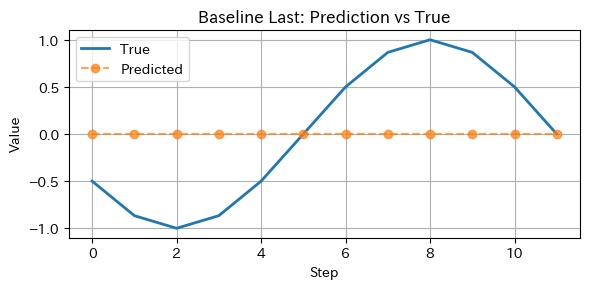

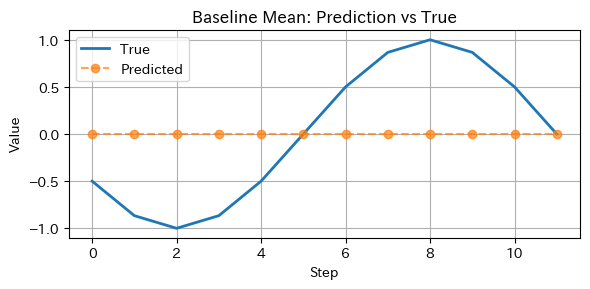

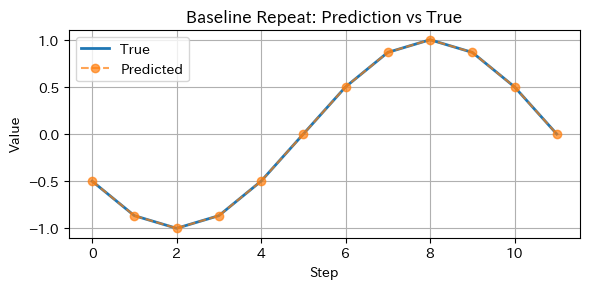

In [88]:
plot_prediction(pred_last, label_name='label_1', title='Baseline Last: Prediction vs True')
plot_prediction(pred_mean, label_name='label_1', title='Baseline Mean: Prediction vs True')
plot_prediction(pred_repeat, label_name='label_1', title='Baseline Repeat: Prediction vs True')

### 3 Multi-output baseline model

「複数の異なる項目（特徴量）を同時に予測する時系列モデル」

今回の場合、予測対象(label)が２つになるのでlabel_columnを２つ用意する必要がある

In [86]:
# ----------------------------
# DataWindow のインスタンス化
# ----------------------------
w = DataWindow(input_width=1,label_width=1,shift=1,stride=1,shuffle=False,
    train_df=train_df,val_df=val_df,test_df=test_df,
    label_columns=['t','y'])

In [87]:
#データウィンドウの確認
print("input_width:", w.input_width)
print("label_width:", w.label_width)
print("shift:", w.shift)
print("stride:", w.stride)
print("total_window_size:", w.total_window_size)
print("input_indices:", w.input_indices)
print("label_indices:", w.label_indices)
print("label_columns:", w.label_columns)
print("column_indices:", w.column_indices)

input_width: 1
label_width: 1
shift: 1
stride: 1
total_window_size: 2
input_indices: [0]
label_indices: [1]
label_columns: ['t', 'y']
column_indices: {'t': 0, 'y': 1}


In [91]:
# Multi-Stepと同様に３つで比較
modes = ['last', 'mean', 'repeat']
val_performance = {}
test_performance = {}

for mode in modes:
    model = BaselineModel(
        label_index=[0,1],
        mode=mode,
        forecast_horizon=1,
        input_width=1
    )
    model.compile(loss=MeanSquaredError(), metrics=[MeanAbsoluteError()])

    # 評価スコアを辞書に保存
    val_loss, val_mae = model.evaluate(w.val, verbose=0)
    test_loss, test_mae = model.evaluate(w.test, verbose=0)

    val_performance[mode] = (val_loss, val_mae)
    test_performance[mode] = (test_loss, test_mae)

    print(f"{mode}: Test MSE={test_loss:.4f}, MAE={test_mae:.4f}")

last: Test MSE=0.5670, MAE=0.6667
mean: Test MSE=0.5670, MAE=0.6667
repeat: Test MSE=0.5670, MAE=0.6667


## 13.3 Applying baseline models

### 13.3.1  Traffic Dataのデータウィンドウの生成

In [88]:
# GitHubのrawデータURL
train = "https://raw.githubusercontent.com/CS-Advanced/DATA/main/CH1213_train.csv"
val = "https://raw.githubusercontent.com/CS-Advanced/DATA/main/CH1213_val.csv"
test = "https://raw.githubusercontent.com/CS-Advanced/DATA/main/CH1213_test.csv"
# データの読み込み
train_df = pd.read_csv(train)
val_df = pd.read_csv(val)
test_df = pd.read_csv(test)
train_df.head()

,temp,clouds_all,traffic_volume,day_sin,day_cos
0,0.760019,0.0,0.758755,0.017037,0.370590
1,0.738174,0.0,0.560765,0.000000,0.500000
2,0.698884,0.0,0.463513,0.017037,0.629410
3,0.668238,0.0,0.370029,0.066987,0.750000
4,0.643093,0.0,0.325101,0.146447,0.853553


In [89]:
test_df.head()

,temp,clouds_all,traffic_volume,day_sin,day_cos
0,0.767405,0.9,0.401563,0.066987,0.750000
1,0.756876,0.9,0.348821,0.146447,0.853553
2,0.754833,0.9,0.302637,0.250000,0.933013
3,0.754833,0.9,0.187108,0.370590,0.982963
4,0.756247,0.9,0.080926,0.500000,1.000000


In [90]:
val_df.head()

,temp,clouds_all,traffic_volume,day_sin,day_cos
0,0.457646,0.01,0.700153,0.250000,0.066987
1,0.460946,0.20,0.769918,0.146447,0.146447
2,0.459375,0.05,0.872750,0.066987,0.250000
3,0.456388,0.20,0.776894,0.017037,0.370590
4,0.440830,0.05,0.664574,0.000000,0.500000


In [95]:
# 全データ数再確認

print("Trainデータ shape:", train_df.shape)
print("Validationデータ shape:", val_df.shape)
print("Testデータ shape:", test_df.shape)

total_len = len(train_df) + len(val_df) + len(test_df)
print("全データ数:", total_len)

Trainデータ shape: (12285, 5)
Validationデータ shape: (3510, 5)
Testデータ shape: (1756, 5)
全データ数: 17551


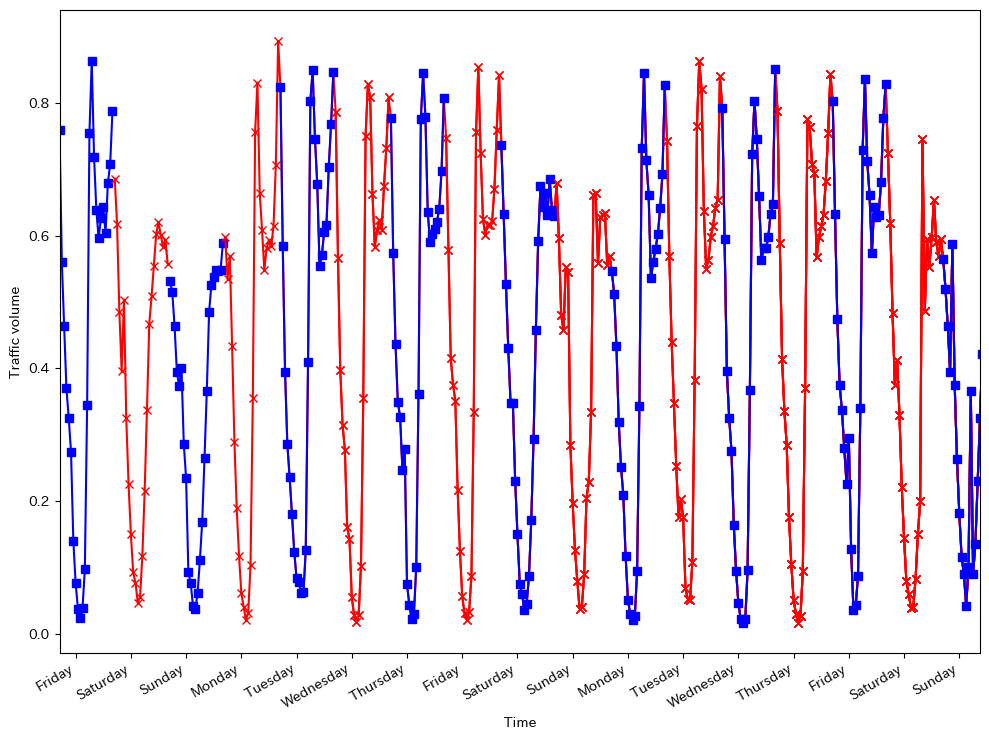

In [97]:
fig, ax = plt.subplots()

for n in range(0,17,2):
    start = 24*n
    stop = 24*(n+1)
    ax.plot(train_df.traffic_volume[start:stop], marker='s', color='blue', label='input')
    ax.plot(train_df.traffic_volume[stop:2*stop], marker='x', color='red', label='label')
ax.set_xlabel('Time')
ax.set_ylabel('Traffic volume')

plt.xticks(np.arange(7, 400, 24), ['Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.xlim(0, 400)

fig.autofmt_xdate()
plt.tight_layout()

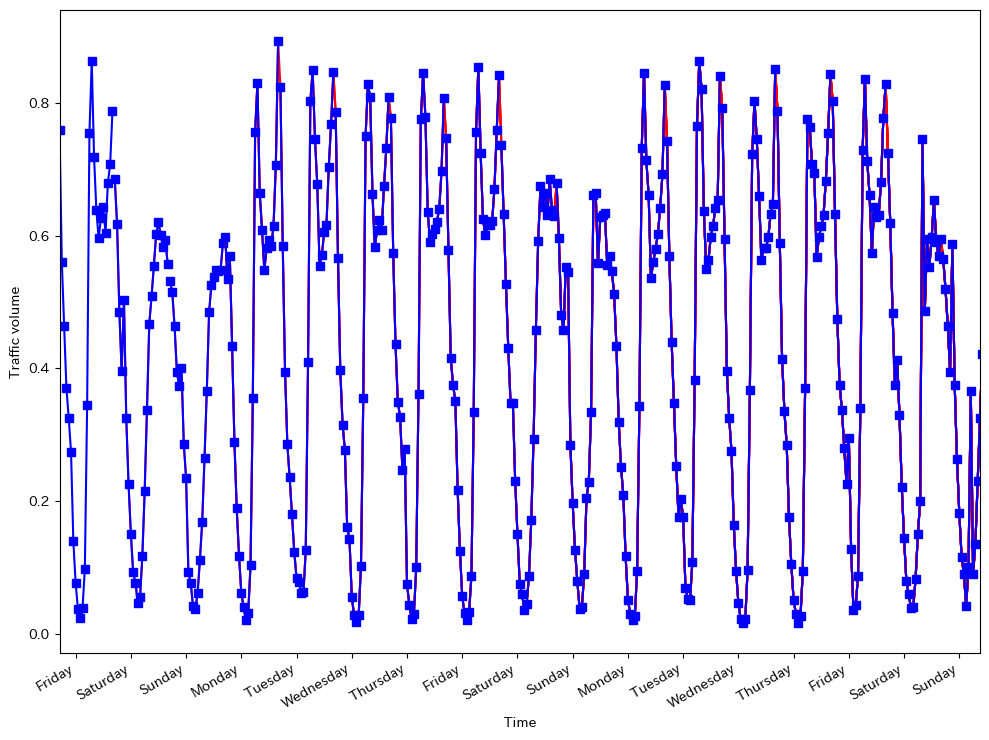

In [98]:
fig, ax = plt.subplots()

for n in range(0,17,1):# for文のステップ幅を1にした場合
    start = 24*n
    stop = 24*(n+1)
    ax.plot(train_df.traffic_volume[start:stop], marker='s', color='blue', label='input')
    ax.plot(train_df.traffic_volume[stop:2*stop], marker='x', color='red', label='label')
ax.set_xlabel('Time')
ax.set_ylabel('Traffic volume')

plt.xticks(np.arange(7, 400, 24), ['Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.xlim(0, 400)

fig.autofmt_xdate()
plt.tight_layout()

- この図の場合、stride=24としていることになります。

In [96]:
# ----------------------------
# 2. DataWindow のインスタンス化
# ----------------------------
w = DataWindow(input_width=24,label_width=24,shift=24,stride=48,
    train_df=train_df,val_df=val_df,test_df=test_df,
    label_columns=['traffic_volume'])

In [97]:
#データウィンドウの確認
print("input_width:", w.input_width)
print("label_width:", w.label_width)
print("shift:", w.shift)
print("stride:", w.stride)
print("total_window_size:", w.total_window_size)
print("input_indices:", w.input_indices)
print("label_indices:", w.label_indices)
print("label_columns:", w.label_columns)
print("column_indices:", w.column_indices)


input_width: 24
label_width: 24
shift: 24
stride: 48
total_window_size: 48
input_indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
label_indices: [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
label_columns: ['traffic_volume']
column_indices: {'temp': 0, 'clouds_all': 1, 'traffic_volume': 2, 'day_sin': 3, 'day_cos': 4}


In [98]:
#可視化用にsample_batchを一つ保持
inputs, labels = w.sample_batch
print("inputs shape:", inputs.shape)
print("labels shape:", labels.shape)
# 最初の1サンプルを表示(Window 1)
print("inputs[0]:", inputs[0, :, :])
print("labels[0]:", labels[0, :, :])

inputs shape: (32, 24, 5)
labels shape: (32, 24, 1)
inputs[0]: tf.Tensor(
[[0.7348735  0.01       0.8604716  0.01703709 0.37059048]
 [0.7328304  0.01       0.6185294  0.         0.5       ]
 [0.72512966 0.01       0.46811777 0.01703709 0.62940955]
 [0.68489707 0.01       0.40770197 0.0669873  0.75      ]
 [0.62501967 0.4        0.41565508 0.14644662 0.8535534 ]
 [0.5830583  0.01       0.47425702 0.25       0.9330127 ]
 [0.54864055 0.01       0.14901632 0.37059048 0.9829629 ]
 [0.53386766 0.01       0.07688014 0.5        1.        ]
 [0.521295   0.01       0.03864937 0.62940955 0.9829629 ]
 [0.50699353 0.01       0.02958002 0.75       0.9330127 ]
 [0.5139085  0.01       0.03083578 0.8535534  0.8535534 ]
 [0.5178375  0.01       0.10283243 0.9330127  0.75      ]
 [0.5139085  0.01       0.36291334 0.9829629  0.62940955]
 [0.5148515  0.01       0.764197   1.         0.5       ]
 [0.50809366 0.01       0.96149015 0.9829629  0.37059048]
 [0.51265126 0.9        0.86493653 0.9330127  0.25      

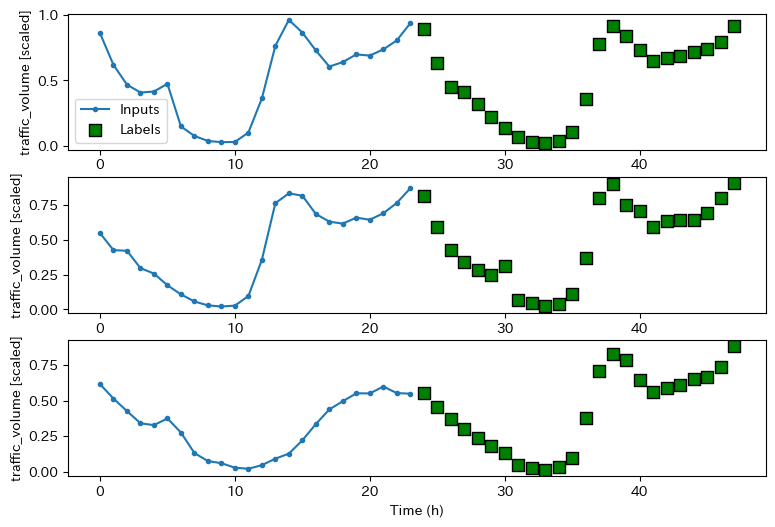

In [99]:
# ----------------------------
# 3. 可視化テスト（モデルなし）
# ----------------------------
w.plot(plot_col='traffic_volume',max_subplots=3)

### 13.3.2  Baseline model prediction: Single step

In [100]:
# ----------------------------
# DataWindow のインスタンス化
# ----------------------------
w_ss = DataWindow(input_width=1,label_width=1,shift=1,stride=1,
    train_df=train_df,val_df=val_df,test_df=test_df,
    label_columns=['traffic_volume'])

In [101]:
# ----------------------------
# 3. データウィンドウの確認
# ----------------------------
print("input_width:", w_ss.input_width)
print("label_width:", w_ss.label_width)
print("shift:", w_ss.shift)
print("stride:", w_ss.stride)
print("shuffle:", w_ss.shuffle)
print("total_window_size:", w_ss.total_window_size)
print("input_indices:", w_ss.input_indices)
print("label_indices:", w_ss.label_indices)
print("label_columns:", w_ss.label_columns)
print("column_indices:", w_ss.column_indices)

input_width: 1
label_width: 1
shift: 1
stride: 1
shuffle: True
total_window_size: 2
input_indices: [0]
label_indices: [1]
label_columns: ['traffic_volume']
column_indices: {'temp': 0, 'clouds_all': 1, 'traffic_volume': 2, 'day_sin': 3, 'day_cos': 4}


In [102]:
modes = ['last']
ss_val_performance = {}
ss_test_performance = {}

for mode in modes:
    model = BaselineModel(
        label_index=2,
        mode=mode,
        forecast_horizon=1,
        input_width=1
    )
    model.compile(loss=MeanSquaredError(), metrics=[MeanAbsoluteError()])

    # 評価スコアを辞書に保存
    val_loss, val_mae = model.evaluate(w_ss.val, verbose=0)
    test_loss, test_mae = model.evaluate(w_ss.test, verbose=0)

    ss_val_performance[mode] = (round(val_loss,4), round(val_mae,4))
    ss_test_performance[mode] = (round(test_loss,4),round(test_mae,4))
    print(f"{mode}: Val MSE={val_loss:.4f}, MAE={val_mae:.4f}")
    print(f"{mode}: Test MSE={test_loss:.4f}, MAE={test_mae:.4f}")

last: Val MSE=0.0133, MAE=0.0831
last: Test MSE=0.0125, MAE=0.0813


In [103]:
ss_val_performance,ss_test_performance

({'last': (0.0133, 0.0831)}, {'last': (0.0125, 0.0813)})

### 13.3.3  Baseline model prediction: Multi step

In [104]:
# ----------------------------
# DataWindow のインスタンス化
# ----------------------------
w_ms = DataWindow(input_width=24,label_width=24,shift=24,stride=1,
    train_df=train_df,val_df=val_df,test_df=test_df,
    label_columns=['traffic_volume'])

In [105]:
# ----------------------------
# データウィンドウの確認
# ----------------------------
print("input_width:", w_ms.input_width)
print("label_width:", w_ms.label_width)
print("shift:", w_ms.shift)
print("stride:", w_ms.stride)
print("shuffle:", w_ms.shuffle)
print("total_window_size:", w_ms.total_window_size)
print("input_indices:", w_ms.input_indices)
print("label_indices:", w_ms.label_indices)
print("label_columns:", w_ms.label_columns)
print("column_indices:", w_ms.column_indices)

input_width: 24
label_width: 24
shift: 24
stride: 1
shuffle: True
total_window_size: 48
input_indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
label_indices: [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
label_columns: ['traffic_volume']
column_indices: {'temp': 0, 'clouds_all': 1, 'traffic_volume': 2, 'day_sin': 3, 'day_cos': 4}


In [106]:
modes = ['last', 'mean', 'repeat']
ms_val_performance = {}
ms_test_performance = {}

label_index = w.column_indices['traffic_volume']

for mode in modes:
    model = BaselineModel(
        label_index=label_index,
        mode=mode,
        forecast_horizon=24,
        input_width=24
    )
    model.compile(loss=MeanSquaredError(), metrics=[MeanAbsoluteError()])

    # 評価スコアを辞書に保存
    val_loss, val_mae = model.evaluate(w_ms.val, verbose=0)
    test_loss, test_mae = model.evaluate(w_ms.test, verbose=0)

    ms_val_performance[mode] = (round(val_loss,4), round(val_mae,4))
    ms_test_performance[mode] = (round(test_loss,4), round(test_mae,4))
    print(f"{mode}: Val MSE={val_loss:.4f}, MAE={val_mae:.4f}")
    print(f"{mode}: Test MSE={test_loss:.4f}, MAE={test_mae:.4f}")

last: Val MSE=0.1498, MAE=0.3090
last: Test MSE=0.1426, MAE=0.3021
mean: Val MSE=0.0797, MAE=0.2462
mean: Test MSE=0.0739, MAE=0.2370
repeat: Val MSE=0.0225, MAE=0.0815
repeat: Test MSE=0.0170, MAE=0.0676


In [107]:
baseline = BaselineModel(label_index=2, mode="last", forecast_horizon=24, input_width=24)
baseline.compile(loss=MeanSquaredError(), metrics=[MeanAbsoluteError()])
# testセットに対する予測結果の抽出
pred_last = Model_Predict(baseline, w.test, label_index=2)

baseline = BaselineModel(label_index=2, mode="mean", forecast_horizon=24, input_width=24)
baseline.compile(loss=MeanSquaredError(), metrics=[MeanAbsoluteError()])
# testセットに対する予測結果の抽出
pred_mean = Model_Predict(baseline, w.test, label_index=2)

baseline = BaselineModel(label_index=2, mode="repeat", forecast_horizon=24, input_width=24)
baseline.compile(loss=MeanSquaredError(), metrics=[MeanAbsoluteError()])
# testセットに対する予測結果の抽出
pred_repeat = Model_Predict(baseline, w.test, label_index=2)

pred_last.head()

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/stepWARNING:tensorflow:6 out of the last 6 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x7ff71ae6dc60> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


2025-06-04 23:30:06.198209: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


,step,true_label_2,pred_label_2
0,0,0.424306,0.454583
1,1,0.431561,0.454583
2,2,0.397098,0.454583
3,3,0.181247,0.454583
4,4,0.092228,0.454583


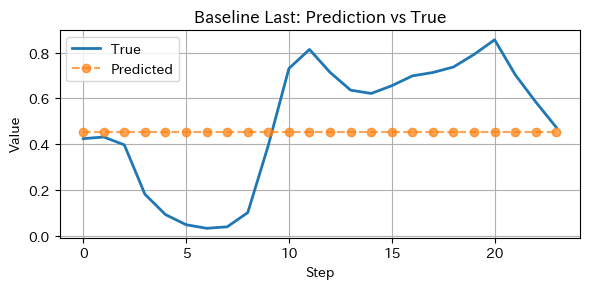

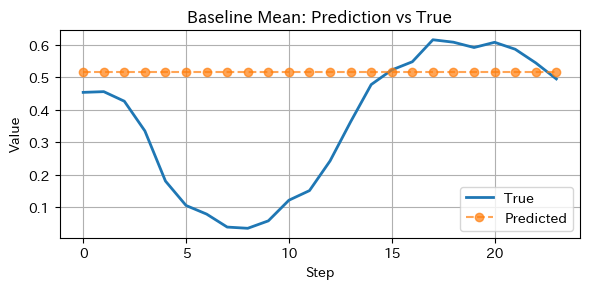

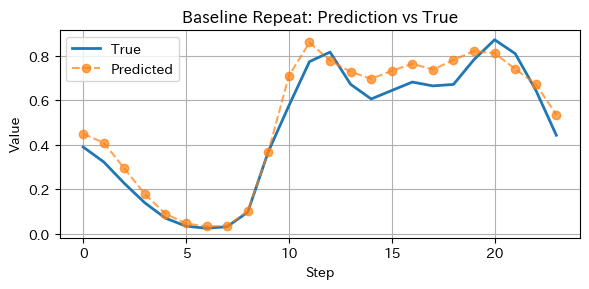

In [108]:
plot_prediction(pred_last, label_name='label_2', title='Baseline Last: Prediction vs True')
plot_prediction(pred_mean, label_name='label_2', title='Baseline Mean: Prediction vs True')
plot_prediction(pred_repeat, label_name='label_2', title='Baseline Repeat: Prediction vs True')

### 13.3.2  Baseline model prediction: Multi output

In [109]:
# ----------------------------
# DataWindow のインスタンス化
# ----------------------------
w_mo = DataWindow(input_width=1,label_width=1,shift=1,stride=1,
    train_df=train_df,val_df=val_df,test_df=test_df,
    label_columns=['temp','traffic_volume'])

In [110]:
# ----------------------------
# データウィンドウの確認
# ----------------------------
print("input_width:", w_mo.input_width)
print("label_width:", w_mo.label_width)
print("shift:", w_mo.shift)
print("stride:", w_mo.stride)
print("shuffle:", w_mo.shuffle)
print("total_window_size:", w_mo.total_window_size)
print("input_indices:", w_mo.input_indices)
print("label_indices:", w_mo.label_indices)
print("label_columns:", w_mo.label_columns)
print("column_indices:", w_mo.column_indices)

input_width: 1
label_width: 1
shift: 1
stride: 1
shuffle: True
total_window_size: 2
input_indices: [0]
label_indices: [1]
label_columns: ['temp', 'traffic_volume']
column_indices: {'temp': 0, 'clouds_all': 1, 'traffic_volume': 2, 'day_sin': 3, 'day_cos': 4}


In [111]:
modes = ['last']
mo_val_performance = {}
mo_test_performance = {}

for mode in modes:
    model = BaselineModel(
        label_index=[0,2],
        mode=mode,
        forecast_horizon=1,
        input_width=1
    )
    model.compile(loss=MeanSquaredError(), metrics=[MeanAbsoluteError()])

    # 評価スコアを辞書に保存
    val_loss, val_mae = model.evaluate(w_mo.val, verbose=0)
    test_loss, test_mae = model.evaluate(w_mo.test, verbose=0)

    mo_val_performance[mode] = (round(val_loss,4), round(val_mae,4))
    mo_test_performance[mode] = (round(test_loss,4),round(test_mae,4))

    print(f"{mode}: Test MSE={test_loss:.4f}, MAE={test_mae:.4f}")

last: Test MSE=0.0064, MAE=0.0470


In [112]:
mo_val_performance,mo_test_performance

({'last': (0.0069, 0.0482)}, {'last': (0.0064, 0.047)})

本章では、データウィンドウの作成を取り上げた。<br>
データウィンドウの作成によりあらゆる種類のモデルを素早く構築することが可能になる。<br>
続いてモデルの種類ごとにベースラインモデルを構築し、以降の章でより複雑なモデルを構築するときに比較できるベンチマークを作成した。<br>

もちろん、ベースラインモデルを構築しただけであり、まだディープラーニングを応用するには至っていない。次章では、線形モデルとディープミューラルネットワークを実装し、それらのモデルの性能がすでに単純なベースラインと比べて良いかどうかを比較する。